In [2]:
import h5py as h5
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.table import vstack, Table, Column
import os 
import matplotlib.animation as animation
from scipy import stats

from IPython.display import clear_output

data_dir = '/mnt/home/lvanson/ceph/CompasOutput/v02.26.03/N1e7Grid_BBH_BHNS_optimized/'

######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
rc('text', usetex=False)
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,25,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=MEDIUM_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize



def Mchirp(m1, m2):
    chirp_mass = np.divide(np.power(np.multiply(m1, m2), 3./5.), np.power(np.add(m1, m2), 1./5.))
    return chirp_mass   

# Read and extract essential data to one gdf5 file

In [12]:

# Define the list of simulations to analyze
simulations = os.listdir(data_dir)
sim_list = [sim for sim in simulations if sim not in ['EssentialData', 'Grid_Call_Stroopwafel.py']]

# Define the list of keys to extract from the DCO data
key_list = ['SEED', 'Metallicity@ZAMS(1)', 'Mass(1)', 'Mass(2)', 'mixture_weight',
            'Stellar_Type(1)', 'Stellar_Type(2)', 'Immediate_RLOF>CE', 'Optimistic_CE', 'Merges_Hubble_Time']

# Define the name of the output HDF5 file
output_file = 'all_simulations.h5'

# Loop over all simulations
with h5.File(data_dir+output_file, 'w') as f:
    for sim in sim_list:

        try:
            # Create a group for the current simulation
            sim_group = f.create_group(sim)

            # Open the HDF5 file containing the rates data
            File = h5.File(data_dir+sim+'/output/Rates/Rate_info.h5', 'r')

            # Set the key for the simulation data to analyze
            SFRD_key = 'Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned'

            # Open the HDF5 file containing the COMPAS simulation data
            dataFile = h5.File(data_dir+sim+'/output/COMPAS_Output_wWeights.h5', 'r')

            # Extract the DCO data for each key in the list
            DCO = Table()
            for key in key_list:
                DCO[key] = dataFile['BSE_Double_Compact_Objects'][key][()]

            # Calculate the more massive and less massive component masses and chirp mass
            DCO['M_moreMassive'] = np.maximum(dataFile['BSE_Double_Compact_Objects']['Mass(1)'][()], dataFile['BSE_Double_Compact_Objects']['Mass(2)'][()])
            DCO['M_lessMassive'] = np.minimum(dataFile['BSE_Double_Compact_Objects']['Mass(1)'][()], dataFile['BSE_Double_Compact_Objects']['Mass(2)'][()])
            DCO['Mchirp'] = Mchirp(DCO['M_moreMassive'], DCO['M_lessMassive'])

            # Reduce the DCO table to only NSNS that merge in a Hubble time
            NSNStable = DCO[File[SFRD_key]['DCOmask'][()]]

            # Save the NSNS table to the HDF5 file
            dco_group = sim_group.create_group('NSNS')
            for dco_key in NSNStable.keys():
                dco_group.create_dataset(dco_key, data=NSNStable[dco_key][()])

            # Save the Rate info to the HDF5 file
            rate_group = sim_group.create_group('Rate_info')
            for key in File[SFRD_key].keys():
                rate_group.create_dataset(key, data=File[SFRD_key][key][()])
        except:
            print('error for ', sim)
            continue

error for  faccFIXEDbeta0.5gammaMIXTUREfcircum0.75zetaHG6.0RemMassFRYER2012SNDELAYEDoutput


# Make animations of the NSNS mass distribution as a funciton of redshift

faccFIXEDbeta0.5zetaHG6.0RemMassFRYER2022fmix2.0SNDELAYED
<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>
(2552934,)
(2023,)
(2023, 40)
(40,)
<KeysViewHDF5 ['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Rates_mu00.025_muz-0.05_alpha-1.77_sigma01.125_sigmaz0.05_a0.02_b1.48_c4.45_d5.9_zBinned', 'Run_Details']>


MovieWriter ffmpeg unavailable; using Pillow instead.


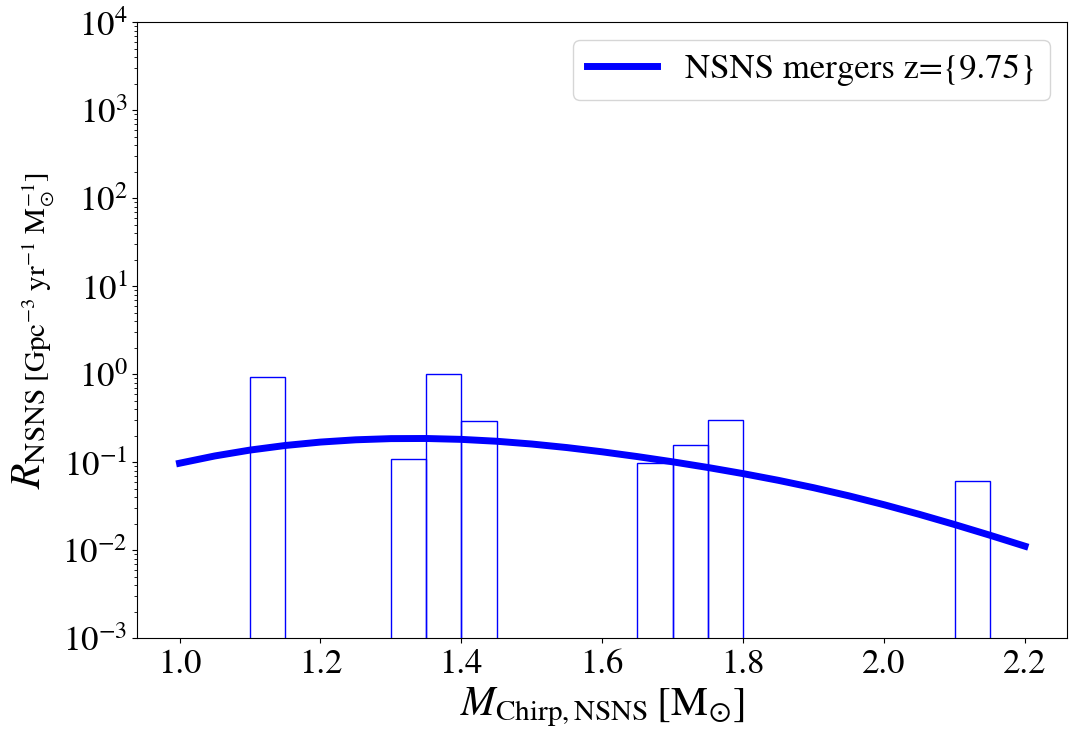

In [5]:

# List of simulations
simulations = os.listdir(data_dir)
simulations = [sim for sim in simulations if sim not in ['EssentialData', 'Grid_Call_Stroopwafel.py']]

for s, sim in enumerate(simulations):
    print(sim)
    try: 
        ####################################
        # Read the rates data
        # Open the HDF5 file containing the rates data
        File = h5.File(data_dir+sim+'/output/Rates/Rate_info.h5', 'r')

        # Set the key for the simulation data to analyze
        sim_key = 'Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned'

        # Print the keys in the simulation data
        print(File[sim_key].keys())

        # Print the shape of each dataset in the simulation data
        for key in File[sim_key].keys():
            print(np.shape(File[sim_key][key][()]))

        ####################################
        # Read COMPAS simulation data
        # Open the HDF5 file containing the COMPAS simulation data
        dataFile = h5.File(data_dir+sim+'/output/COMPAS_Output_wWeights.h5', 'r')

        # Print the keys in the COMPAS simulation data
        print(dataFile.keys())

        # Set the key for the double compact object (DCO) data
        DCO_key = 'BSE_Double_Compact_Objects'

        # Set the list of keys to extract from the DCO data
        key_list = ['SEED', 'Metallicity@ZAMS(1)', 'Mass(1)','Mass(2)','mixture_weight', 'Stellar_Type(1)', 'Stellar_Type(2)', 'Immediate_RLOF>CE', 'Optimistic_CE', 'Merges_Hubble_Time']

        # Create an empty table to store the DCO data
        DCO = Table()

        # Extract the DCO data for each key in the list
        for key in key_list:
            DCO[key] = dataFile[DCO_key][key][()]

        # Calculate the more massive and less massive component masses and chirp mass
        DCO['M_moreMassive'] = np.maximum(dataFile[DCO_key]['Mass(1)'][()], dataFile[DCO_key]['Mass(2)'][()])
        DCO['M_lessMassive'] = np.minimum(dataFile[DCO_key]['Mass(1)'][()], dataFile[DCO_key]['Mass(2)'][()])
        DCO['Mchirp'] = Mchirp(DCO['M_moreMassive'], DCO['M_lessMassive'])

        # Reduce the DCO table to only NSNS that merge in a Hubble time
        NSNStable = DCO[File[sim_key]['DCOmask'][()]]

        ####################################
        # Create a figure and axis for the animation
        fig, ax = plt.subplots(figsize=(12, 8))

        # Define the bins and x values for the KDE
        Mbinwidth = 0.05
        bins = np.arange(1, 2.2, Mbinwidth)
        x_KDE = np.arange(1, 2.2, 0.05)

        # Define whether to normalize the histogram by its peak value
        normalize_by_peak = True

        # Create the animation function
        def animate(i):
            # Clear the axis
            ax.clear()

            # Extract the rates and redshift for the current frame
            rates = File[sim_key]['merger_rate'][()]
            redshifts = File[sim_key]['redshifts'][()]
            redshift_i = i % len(redshifts)

            # Plot the histogram
            hist, bin_edge = np.histogram(NSNStable['Mchirp'], weights=rates[:, redshift_i], bins=bins)
            center_bins = (bin_edge[:-1] + bin_edge[1:]) / 2.

            if normalize_by_peak:
                norm = max(hist / Mbinwidth)
            else:
                norm = 1.

            y_vals = hist / Mbinwidth / norm
            ax.bar(center_bins, y_vals, width=np.diff(bins),
                alpha=1.0, fill=False, edgecolor='blue', lw=1.)

            # Plot the KDE
            kernel = stats.gaussian_kde(NSNStable['Mchirp'], weights=rates[:, redshift_i], bw_method='silverman')
            KDEy_vals = kernel(x_KDE) * sum(hist) / norm  # re-normalize the KDE
            ax.plot(x_KDE, KDEy_vals, label='NSNS mergers z=%s' % {redshifts[redshift_i]}, color='blue', lw=5)

            # Set the axis labels and limits
            ax.set_xlabel('$M_{\mathrm{Chirp,NSNS} \ } [\mathrm{M_{\odot}} ]$', fontsize=30)
            ax.set_ylabel('$R_{\mathrm{NSNS} \ \mathrm{[Gpc^{-3} \ yr^{-1} \ M_{\odot}^{-1}}]}$', fontsize=30)
            ax.set_yscale('log')
            ax.set_ylim(1e-3, 1e4)
            ax.legend()

        # Create the animation object
        ani = animation.FuncAnimation(fig, animate, frames=len(File[sim_key]['redshifts']), interval=500)

        # Save the animation as a GIF file
        # ani.save(data_dir+sim+'/output/Rates/NSNS_merger_rates.gif')
        ani.save('../Figures/'+sim+'_NSNS_merger_rates.gif')

        # Show the animation
        plt.show()

    except:
        print('No rates data for %s' % {sim})

    # Clear output after each iteration
    clear_output(wait=True)

sum(hist) 49.17888887921754 sum(hist*Mbinwidth) 2.4589444439608763


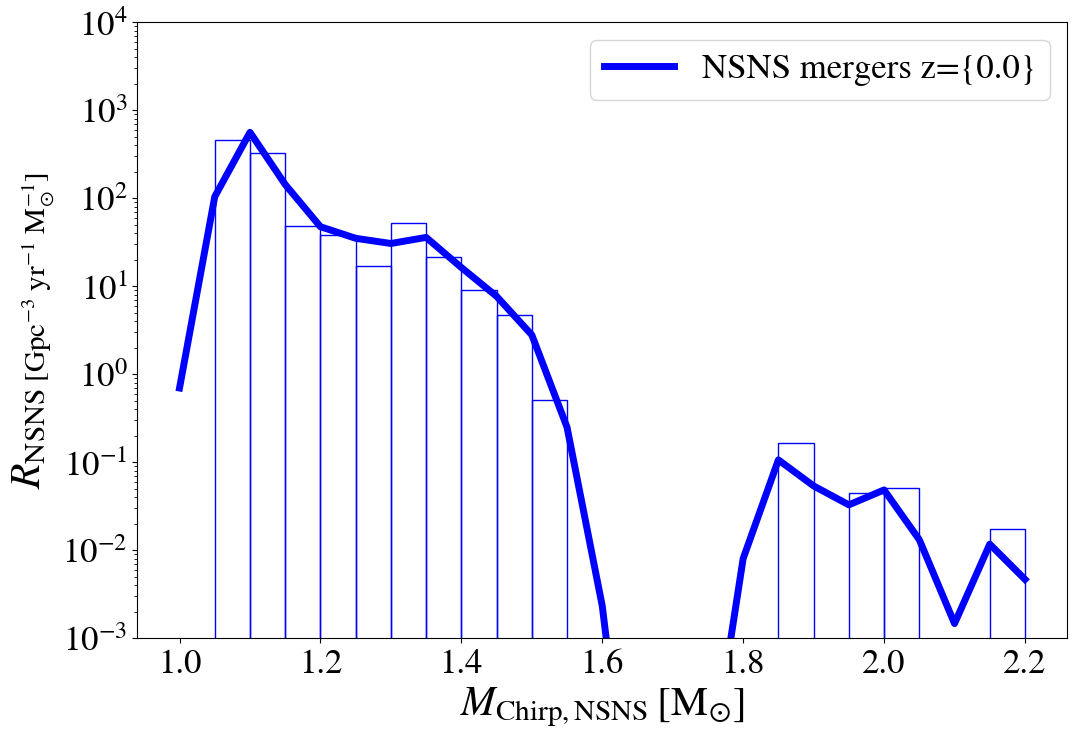

sum(hist) 55.33176459610957 sum(hist*Mbinwidth) 2.7665882298054782


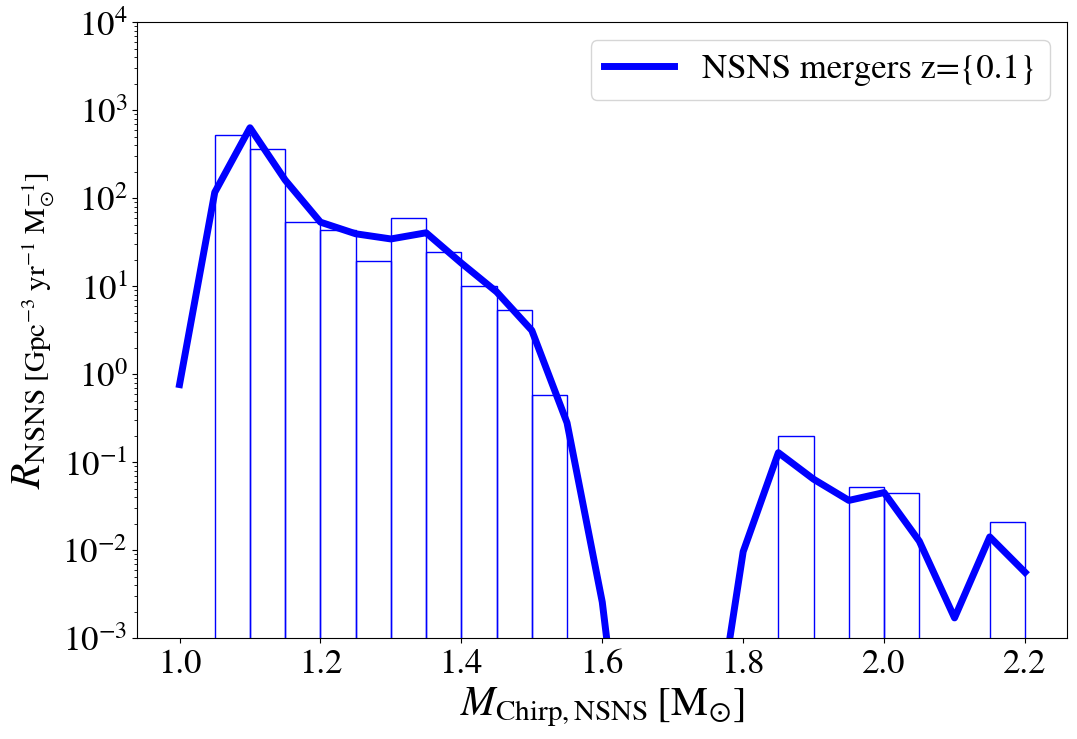

sum(hist) 62.28471924128592 sum(hist*Mbinwidth) 3.1142359620642965


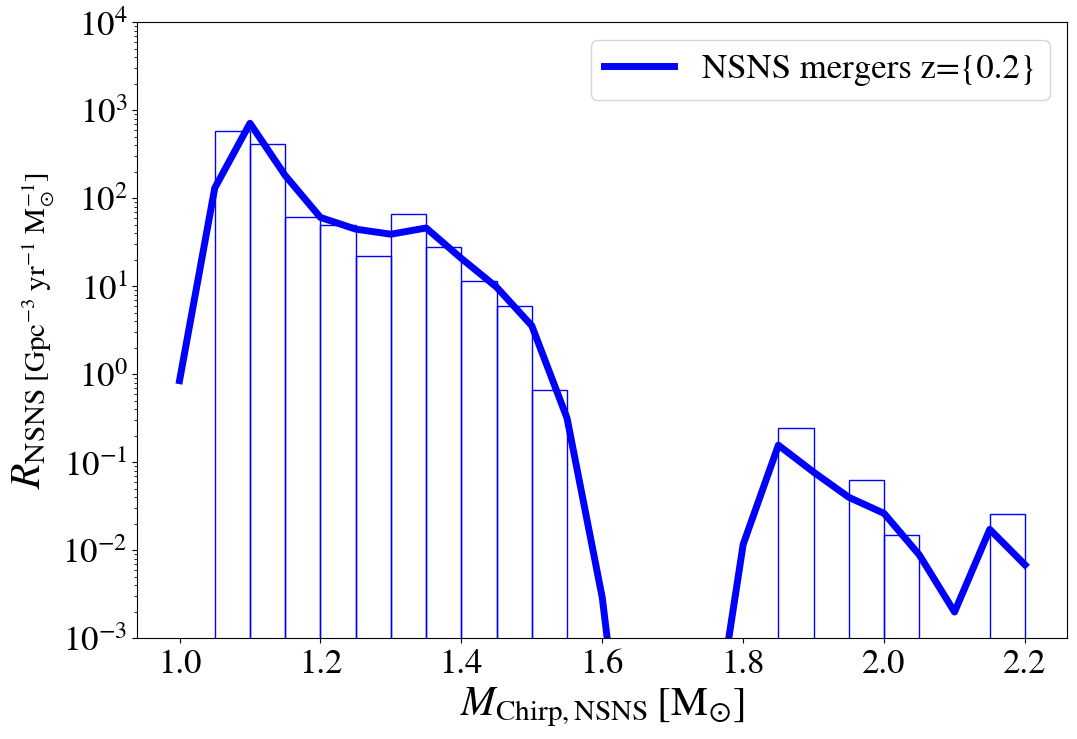

sum(hist) 69.9298948131698 sum(hist*Mbinwidth) 3.4964947406584908


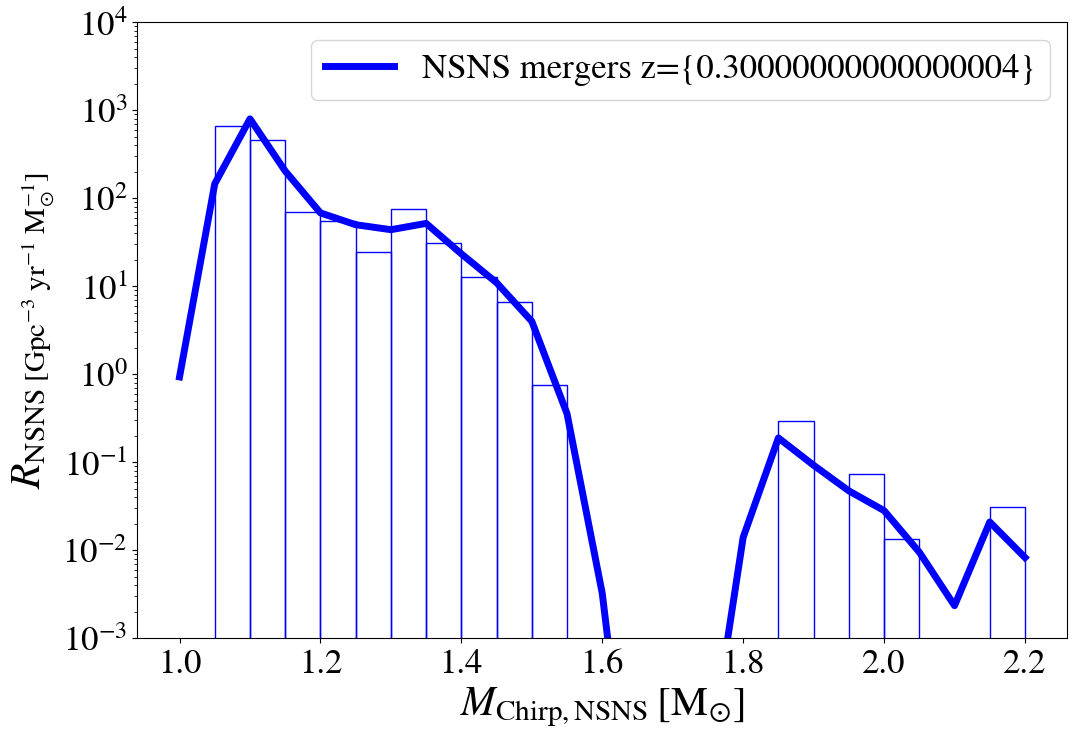

sum(hist) 77.92648538059554 sum(hist*Mbinwidth) 3.896324269029777


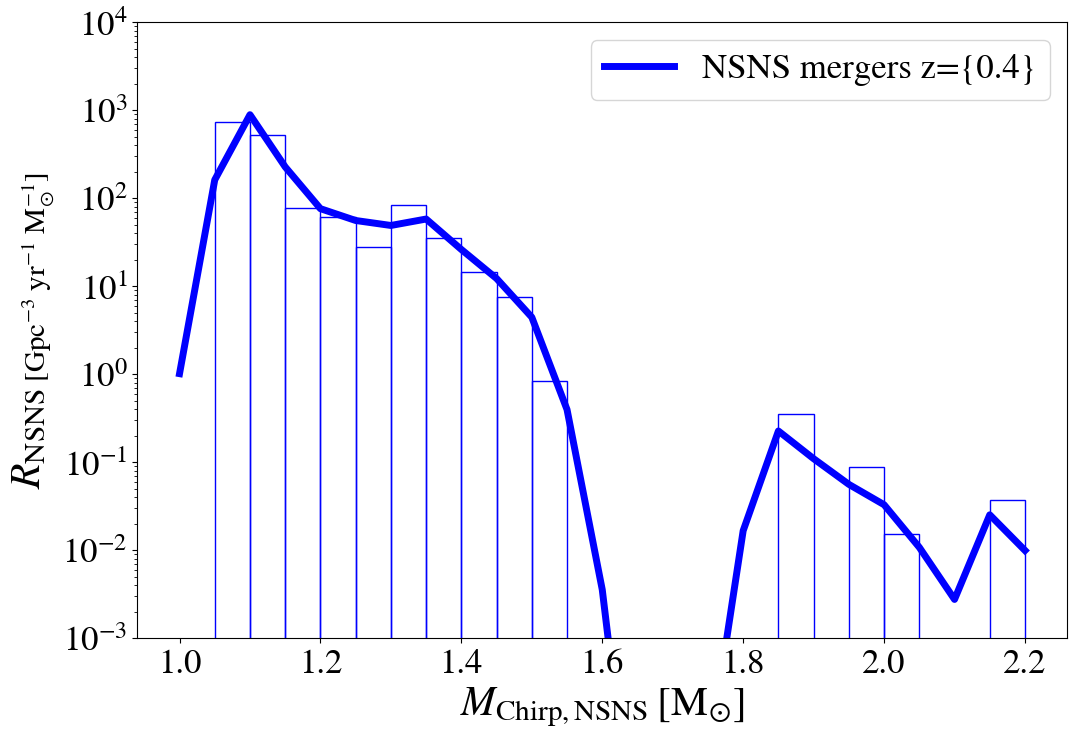

sum(hist) 85.8338301719225 sum(hist*Mbinwidth) 4.291691508596125


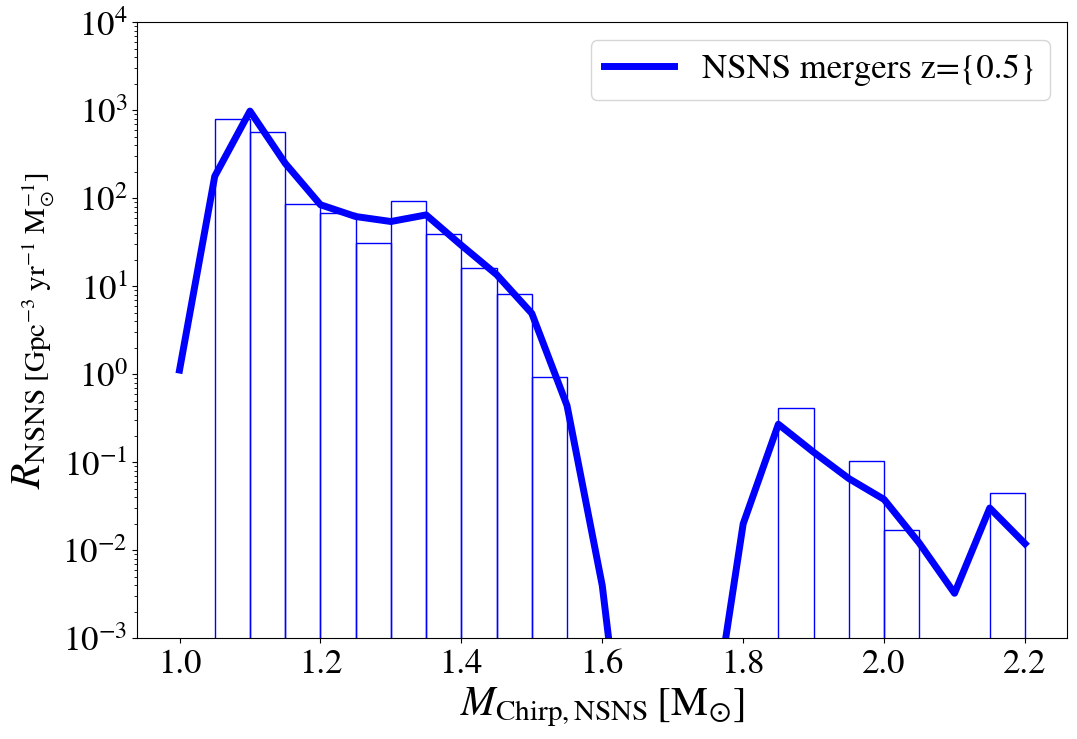

sum(hist) 93.67541206210093 sum(hist*Mbinwidth) 4.683770603105048


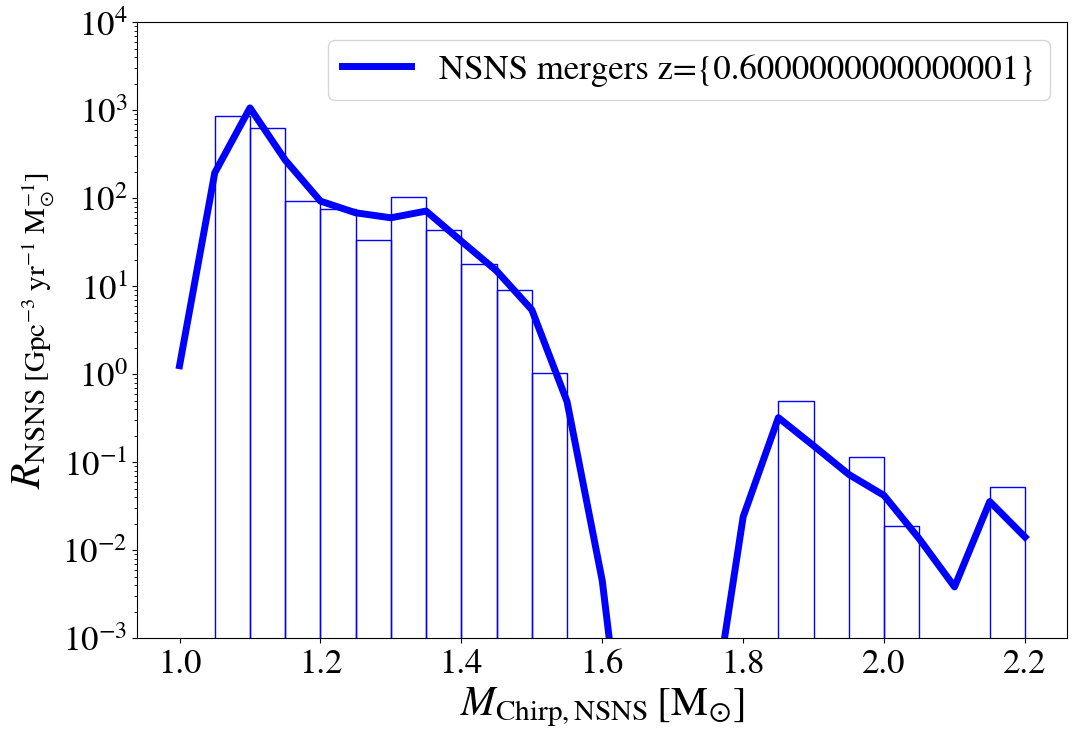

sum(hist) 101.8965896548923 sum(hist*Mbinwidth) 5.094829482744616


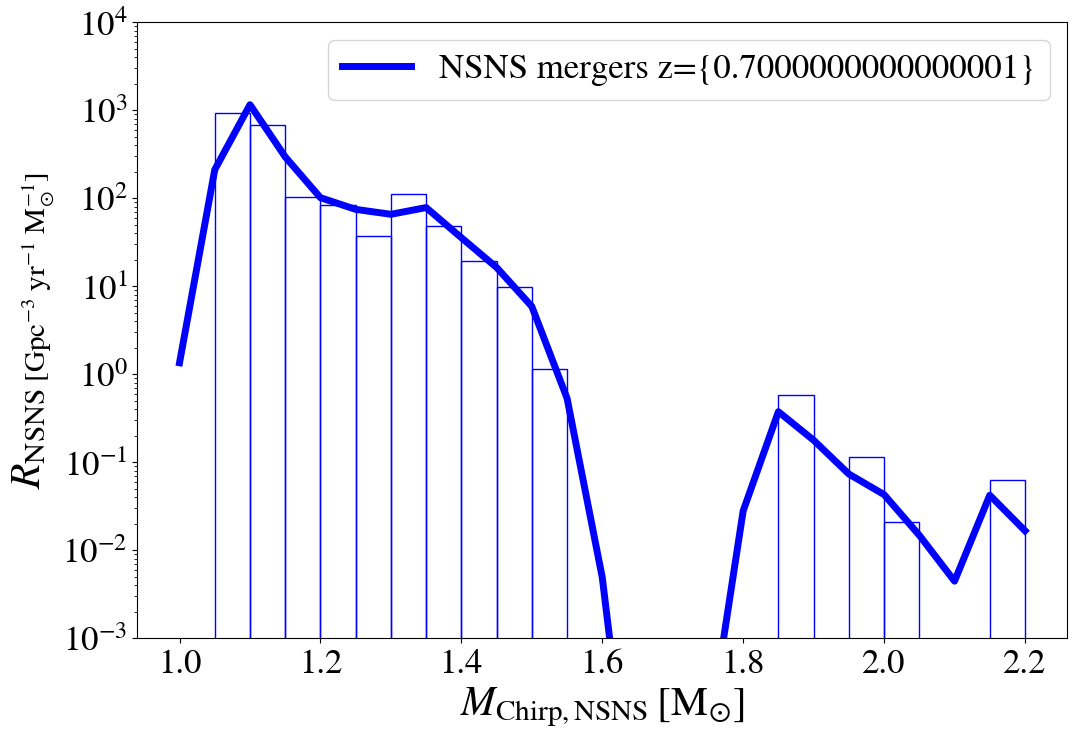

sum(hist) 110.36928793259072 sum(hist*Mbinwidth) 5.518464396629534


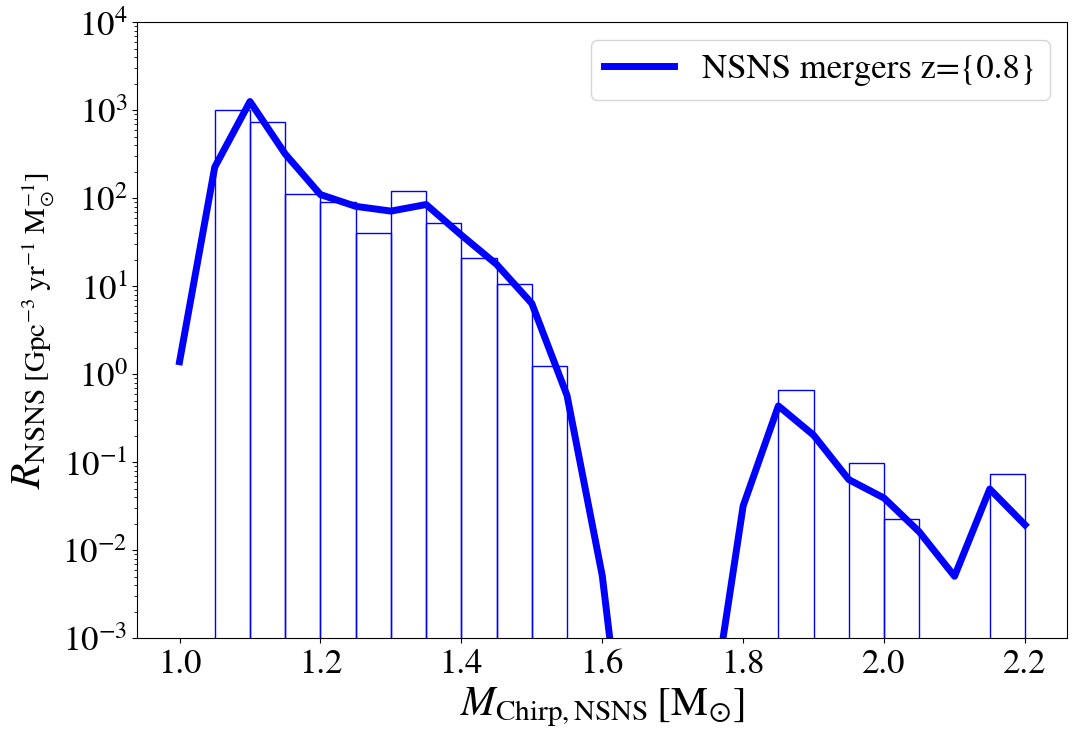

sum(hist) 118.98594063076338 sum(hist*Mbinwidth) 5.949297031538168


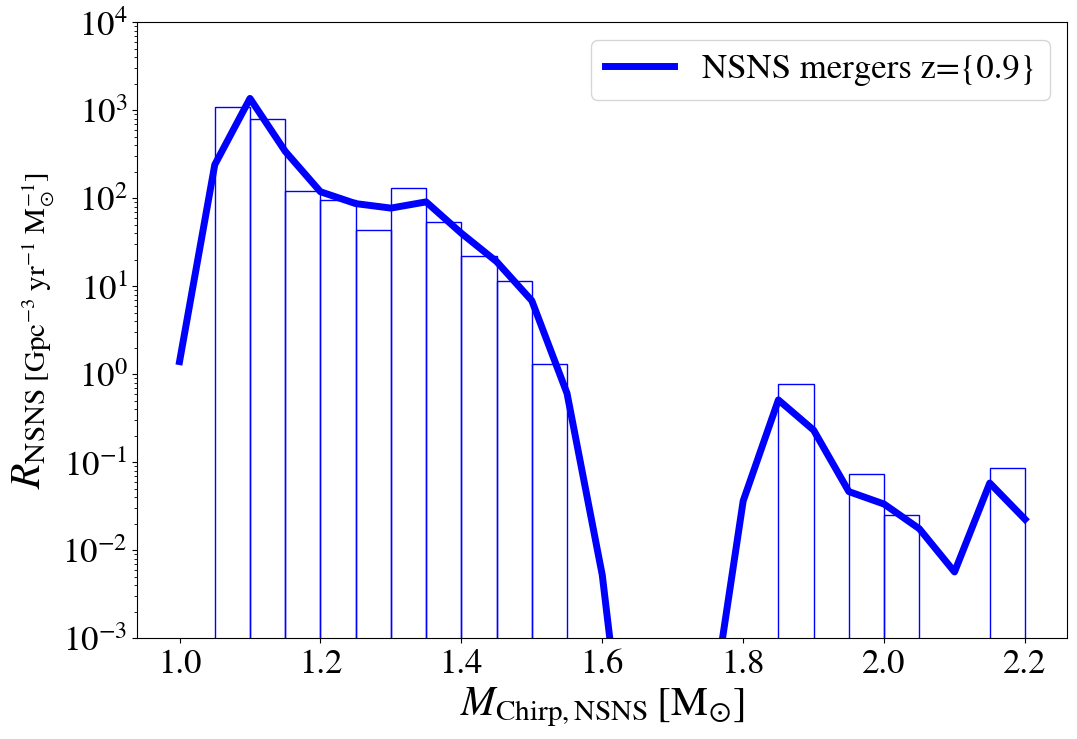

sum(hist) 127.78640726839139 sum(hist*Mbinwidth) 6.38932036341957


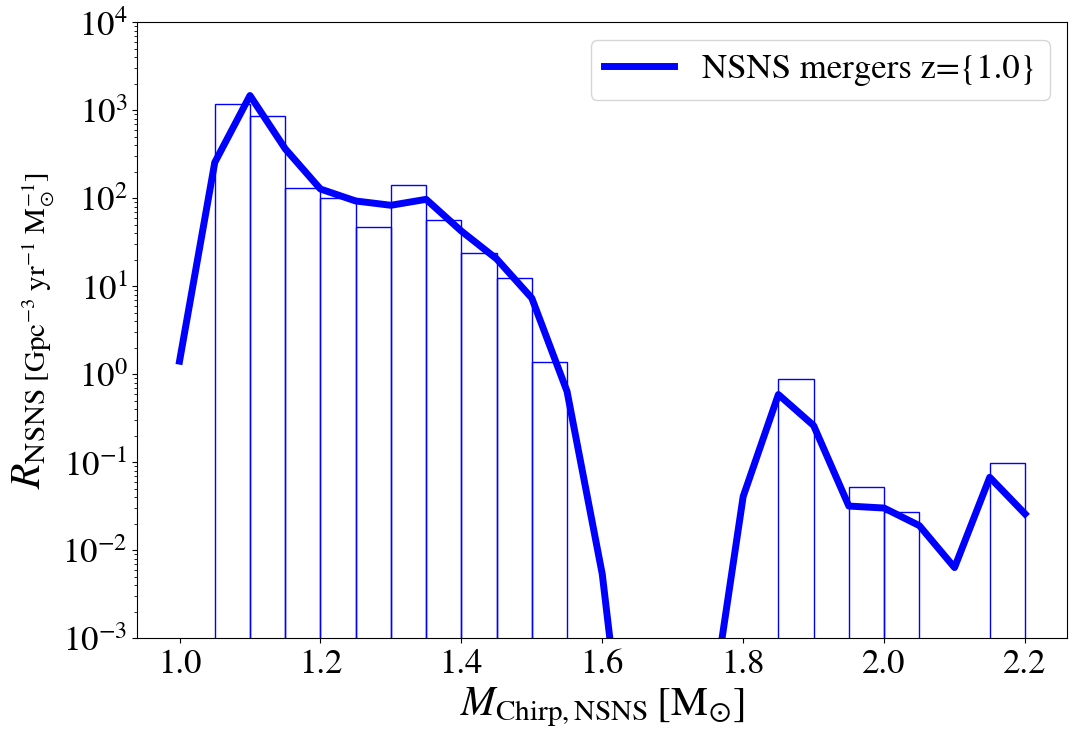

sum(hist) 136.74100916956516 sum(hist*Mbinwidth) 6.8370504584782585


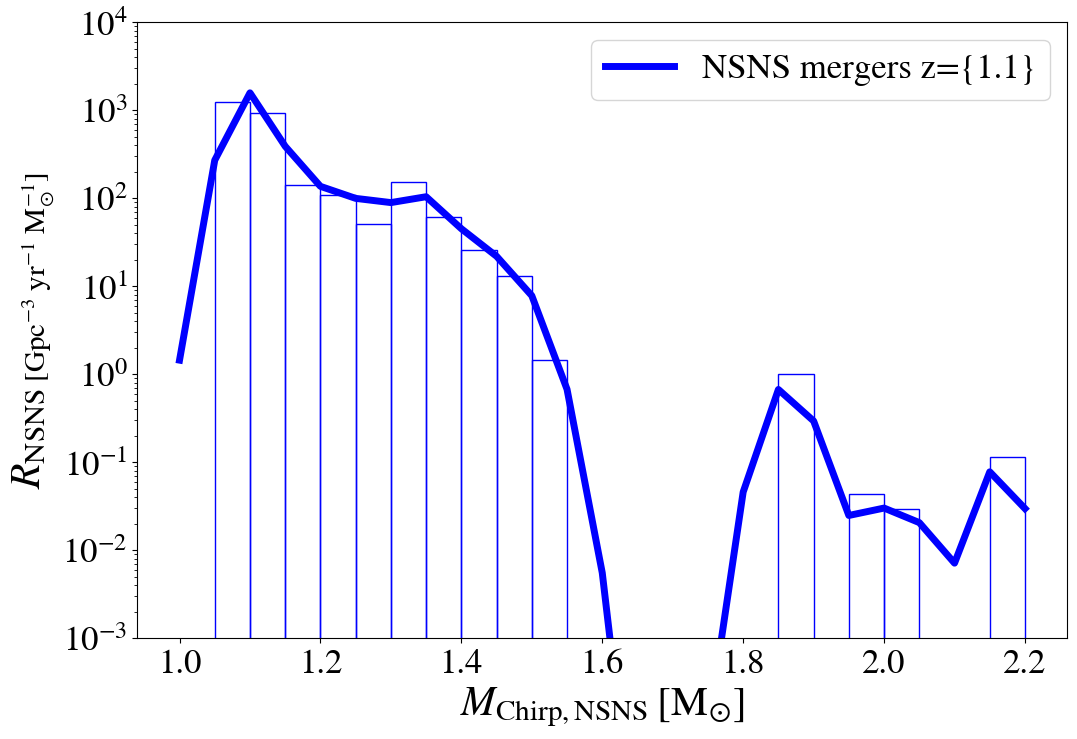

sum(hist) 145.69080795090855 sum(hist*Mbinwidth) 7.284540397545428


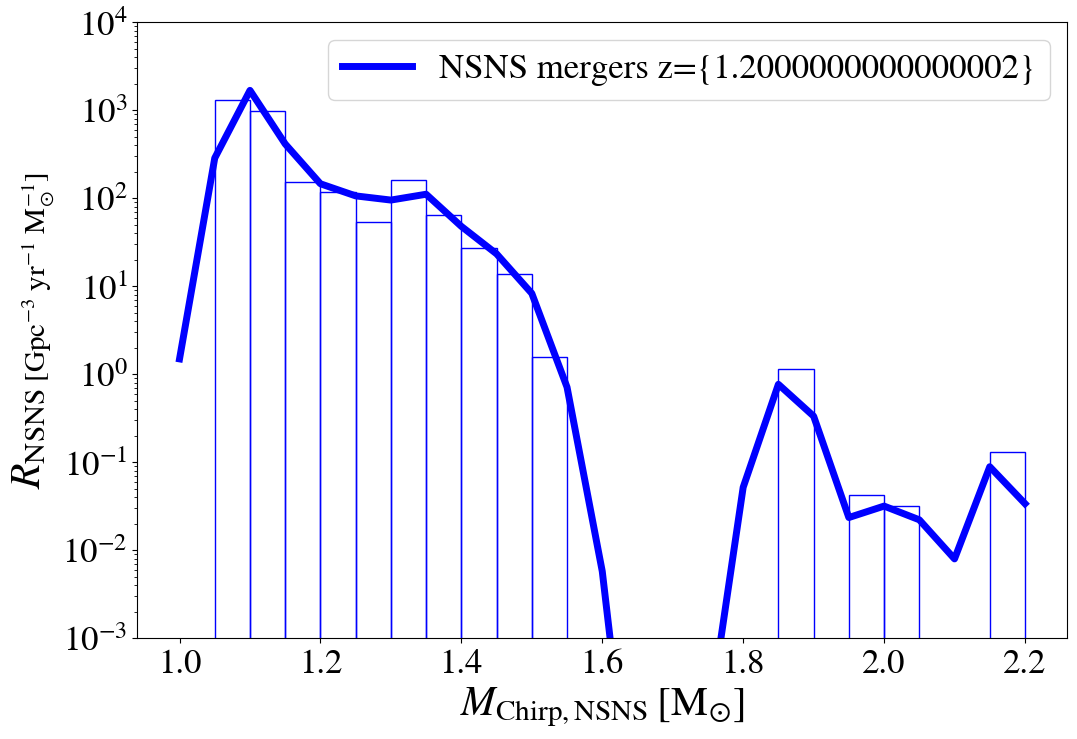

sum(hist) 154.51502715782263 sum(hist*Mbinwidth) 7.725751357891132


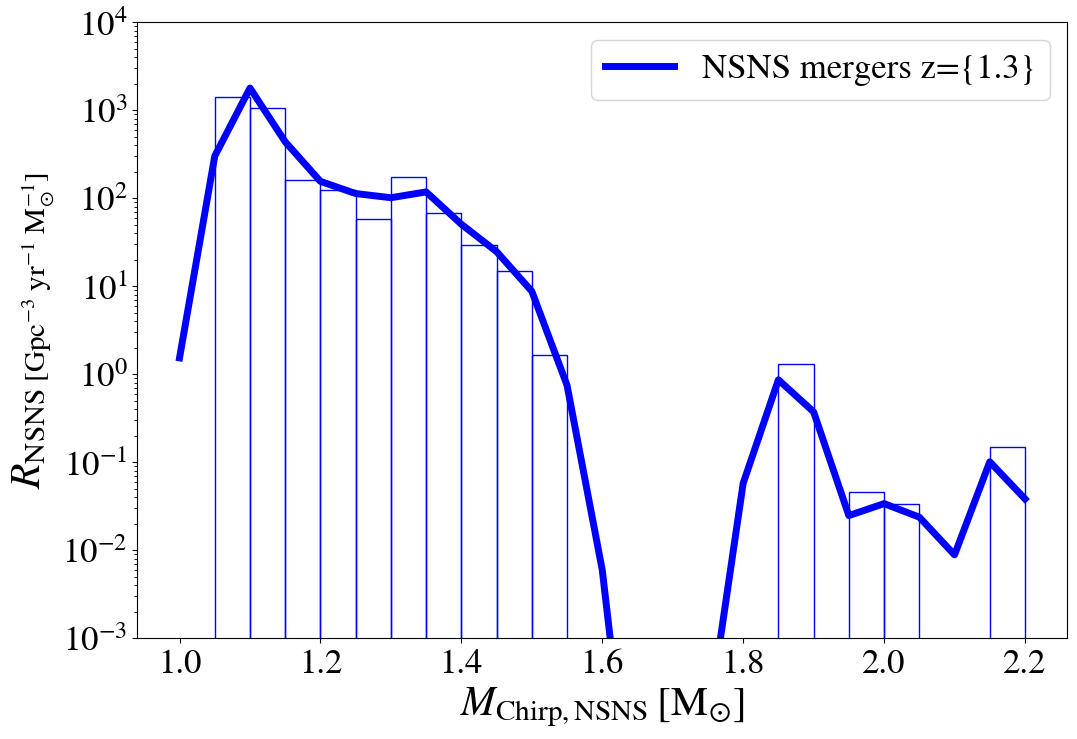

sum(hist) 163.18420004834329 sum(hist*Mbinwidth) 8.159210002417167


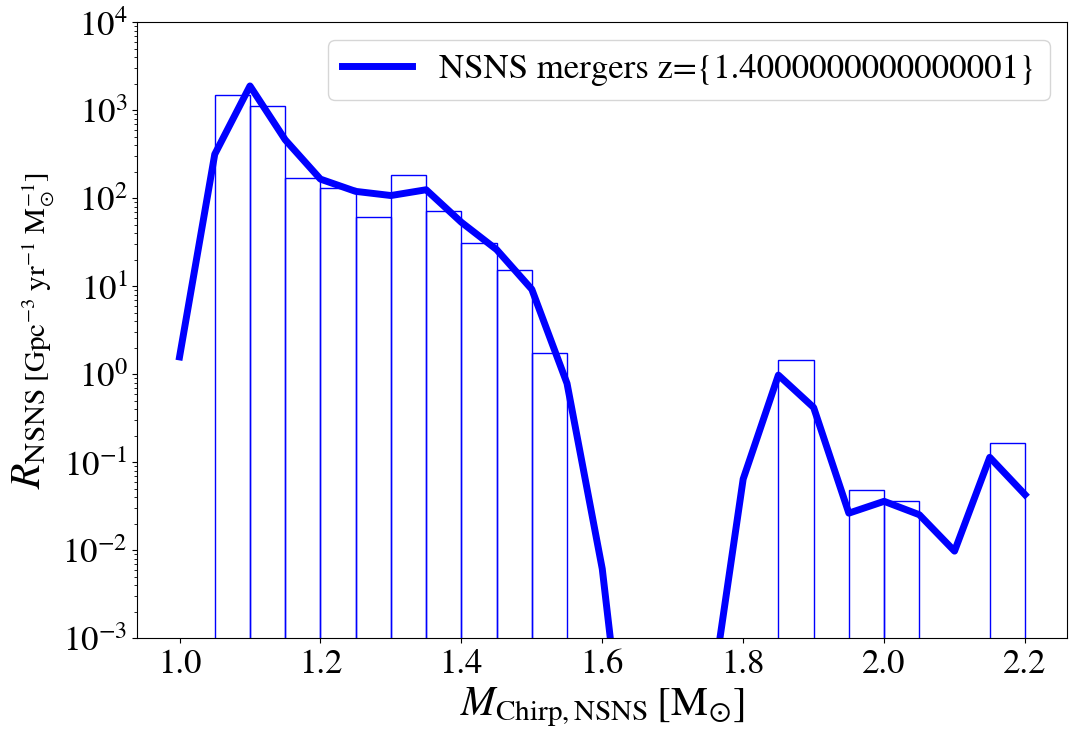

sum(hist) 171.64811826340744 sum(hist*Mbinwidth) 8.582405913170371


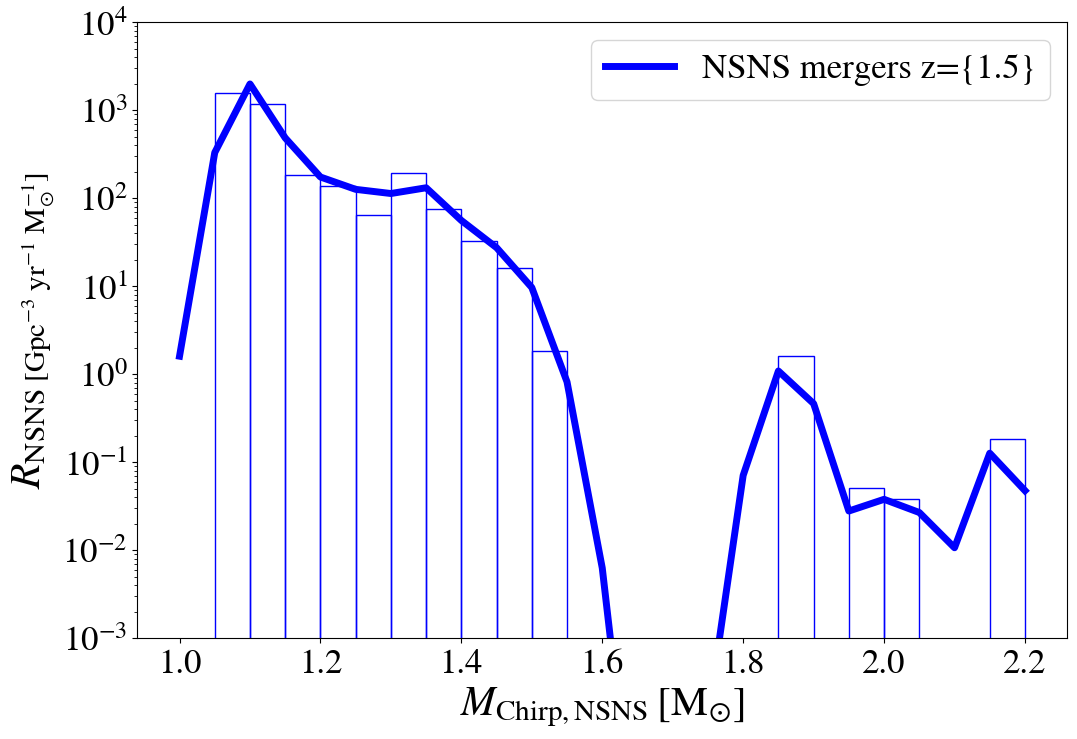

sum(hist) 179.88746738327623 sum(hist*Mbinwidth) 8.994373369163812


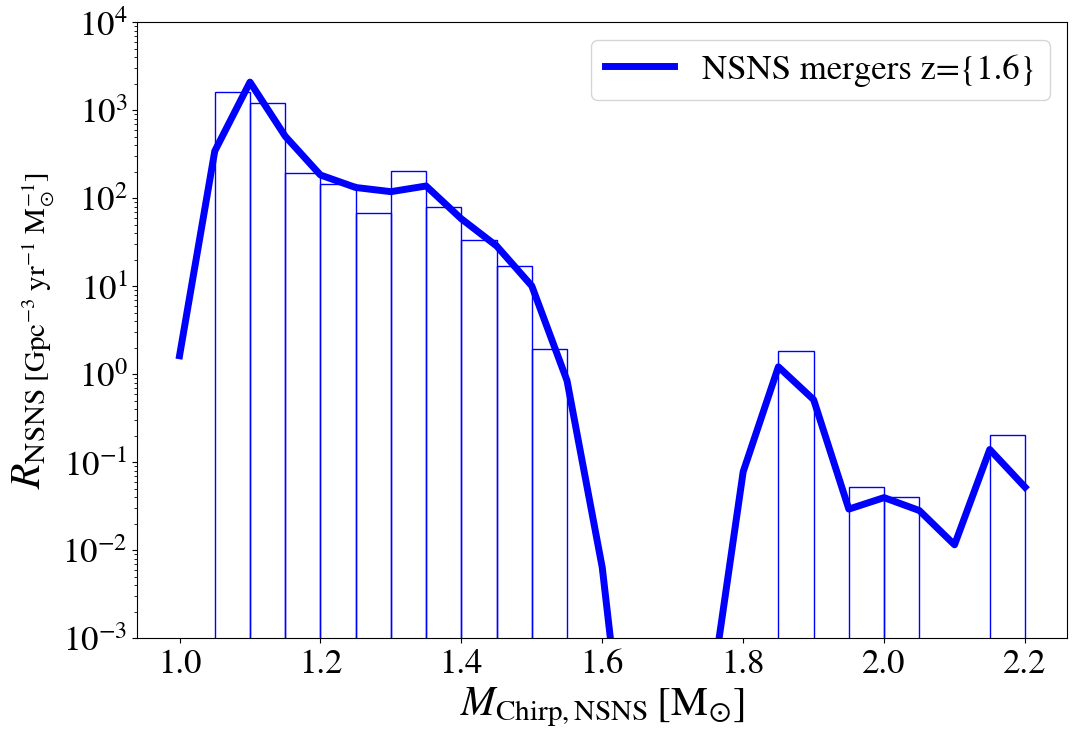

sum(hist) 187.75993311616693 sum(hist*Mbinwidth) 9.387996655808346


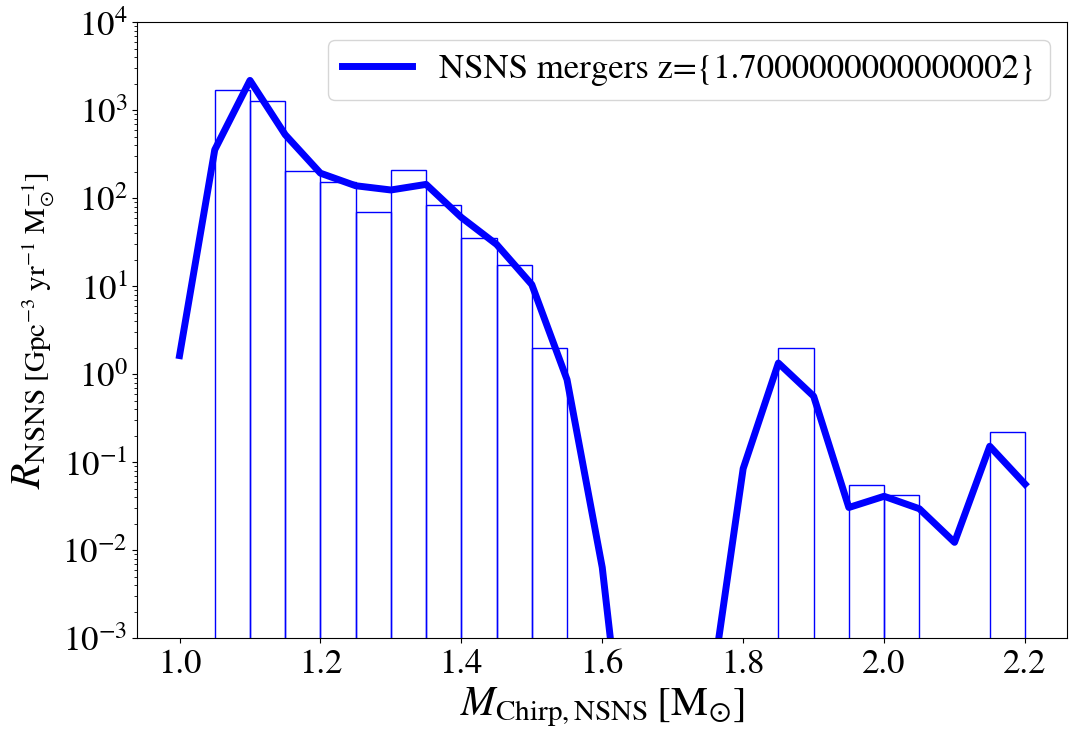

sum(hist) 195.22359409867443 sum(hist*Mbinwidth) 9.761179704933722


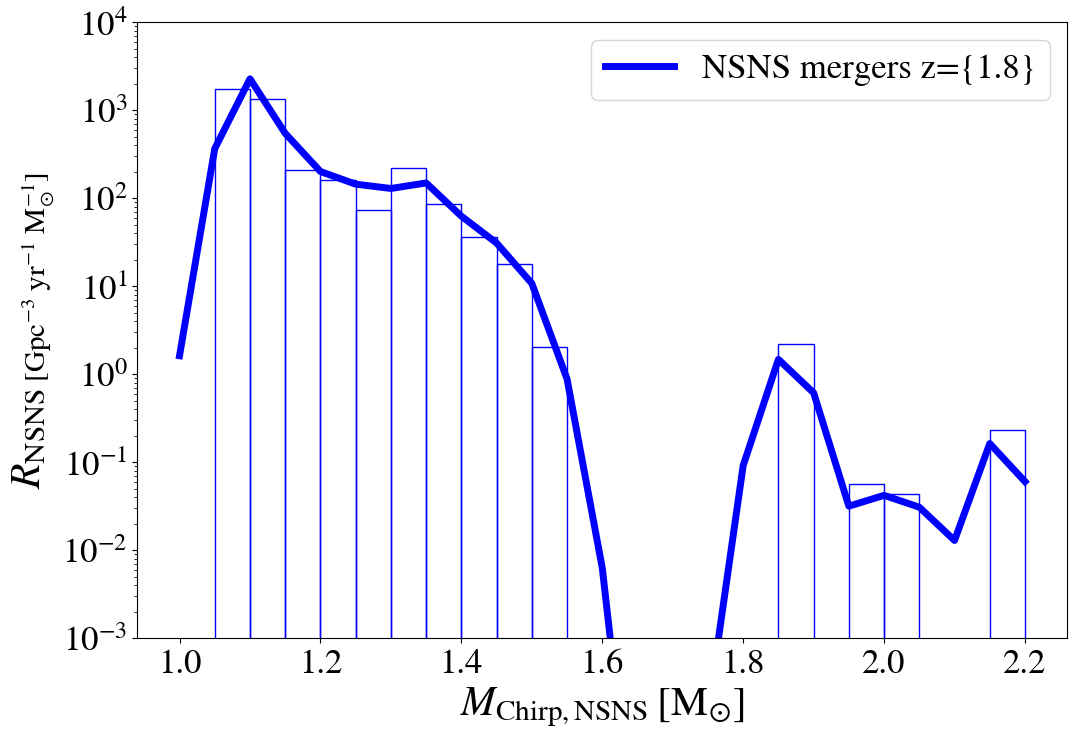

sum(hist) 202.17499208052345 sum(hist*Mbinwidth) 10.108749604026176


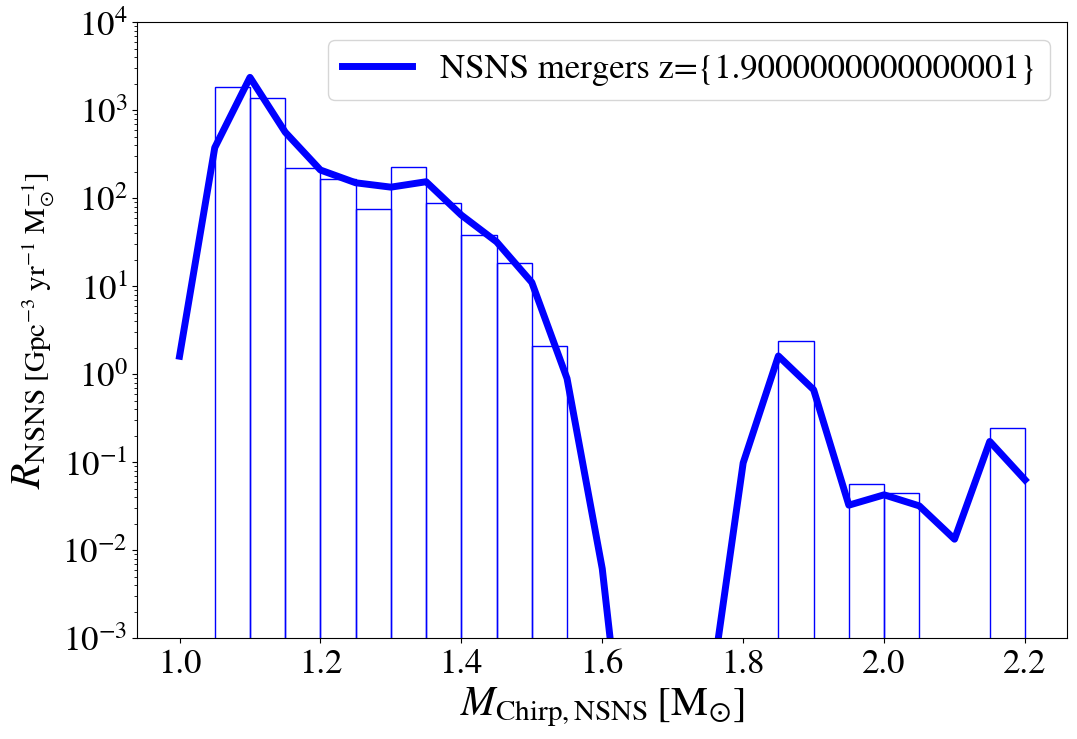

sum(hist) 208.47153079417825 sum(hist*Mbinwidth) 10.423576539708911


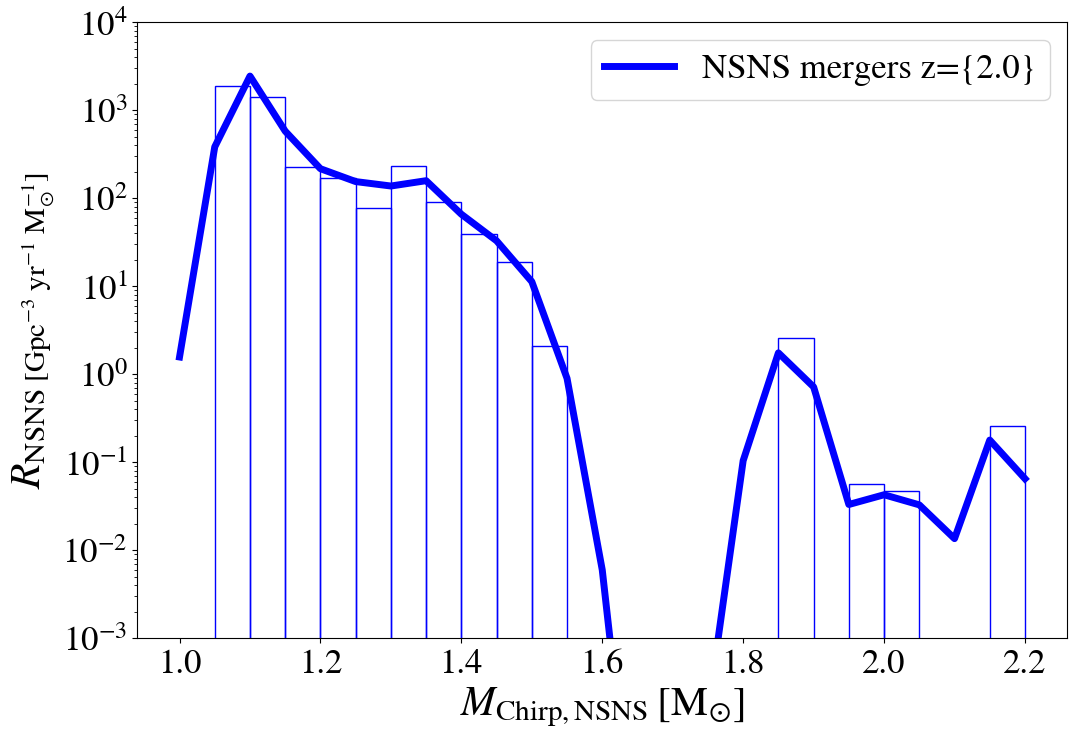

sum(hist) 214.04135129381814 sum(hist*Mbinwidth) 10.702067564690905


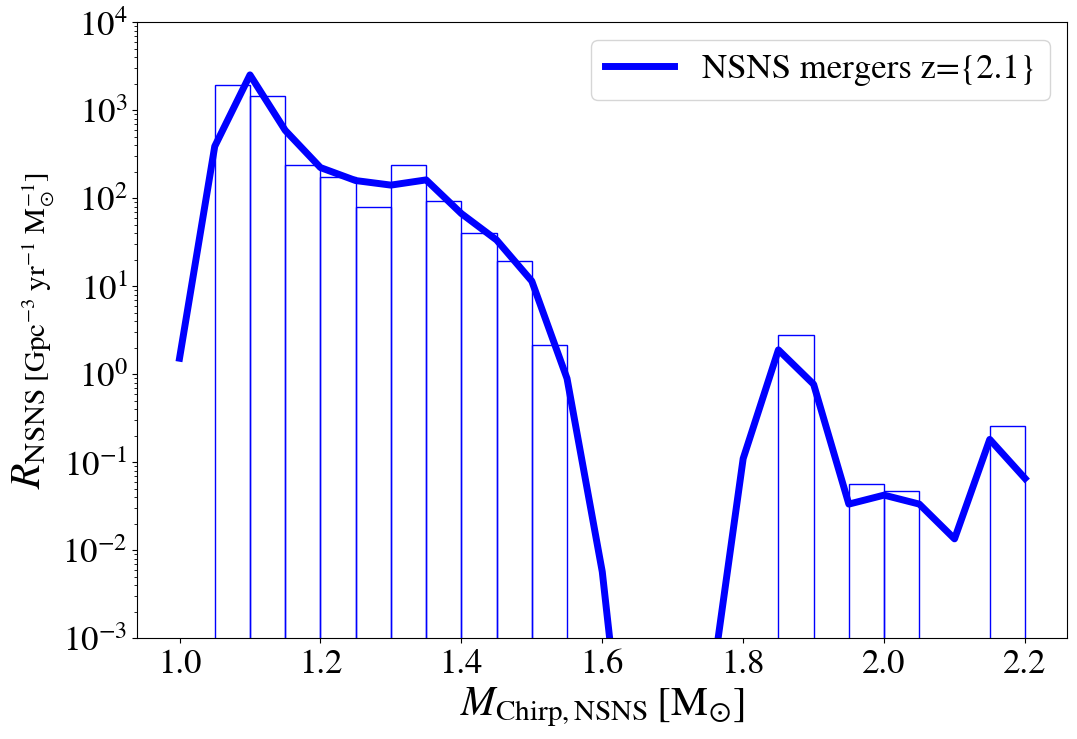

sum(hist) 218.7655687363636 sum(hist*Mbinwidth) 10.938278436818177


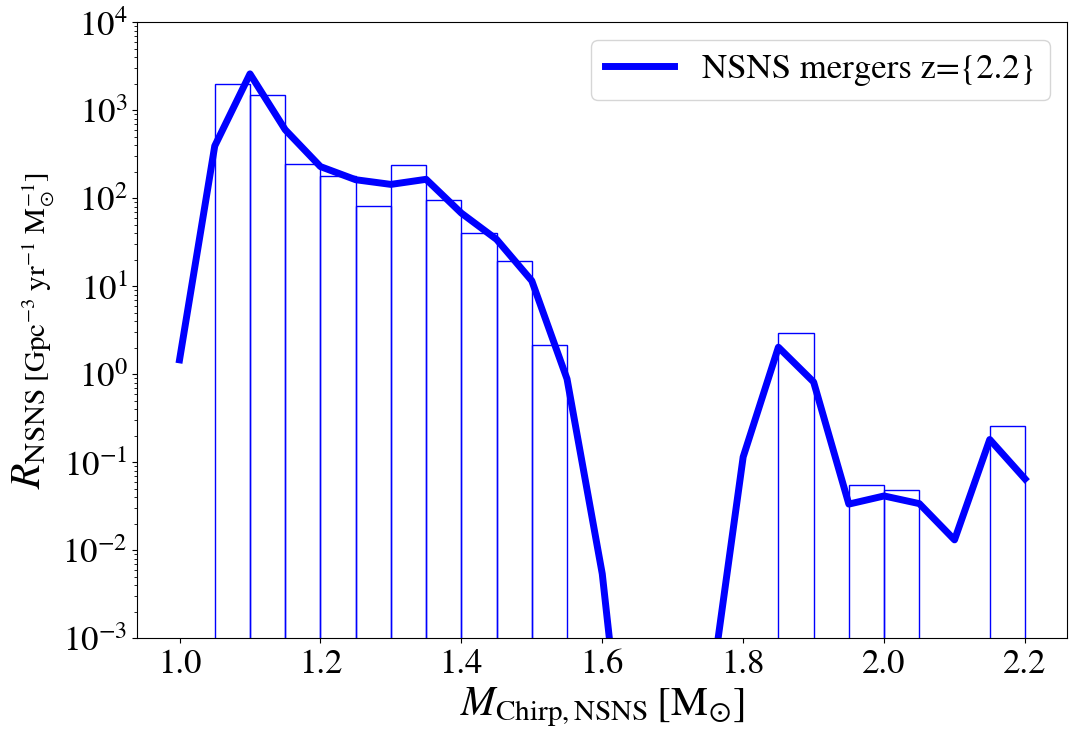

sum(hist) 222.56641243460174 sum(hist*Mbinwidth) 11.12832062173009


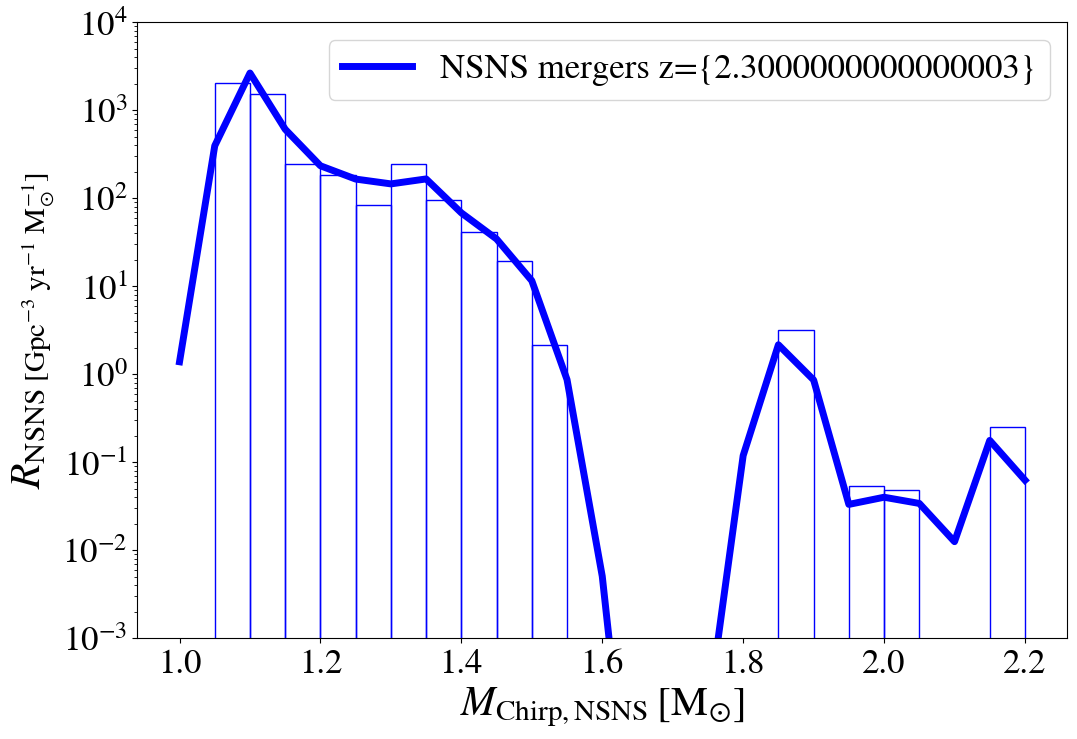

sum(hist) 225.36314405133652 sum(hist*Mbinwidth) 11.268157202566826


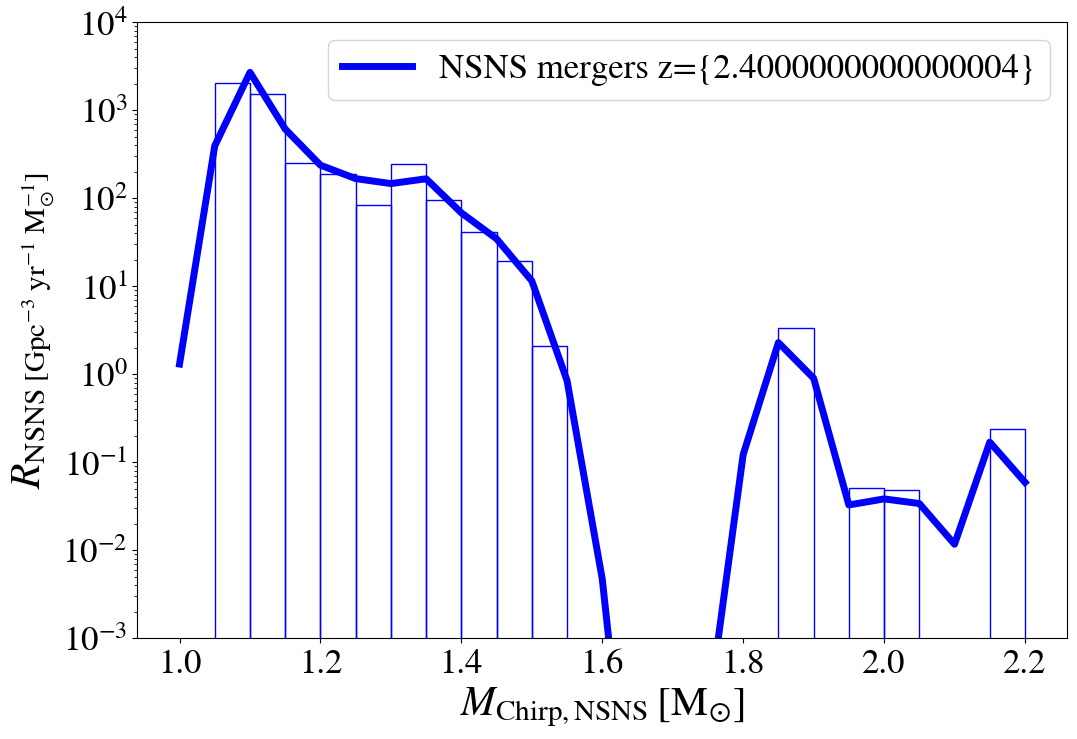

sum(hist) 227.09895385341977 sum(hist*Mbinwidth) 11.354947692670992


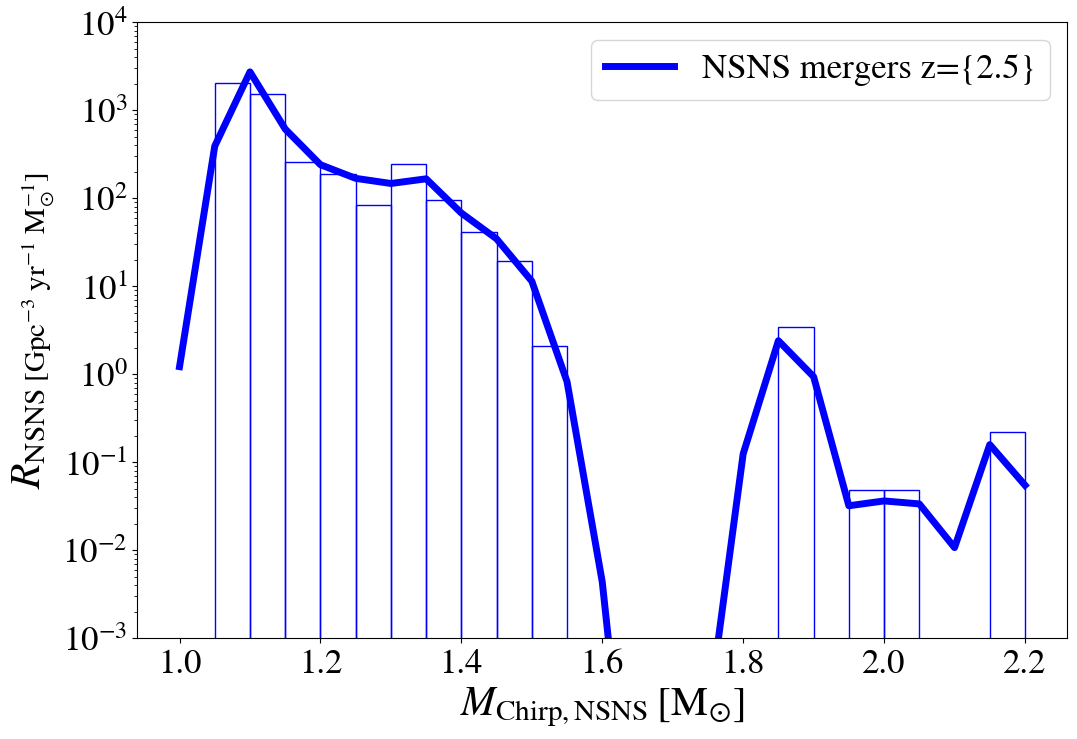

sum(hist) 227.72334296426422 sum(hist*Mbinwidth) 11.38616714821321


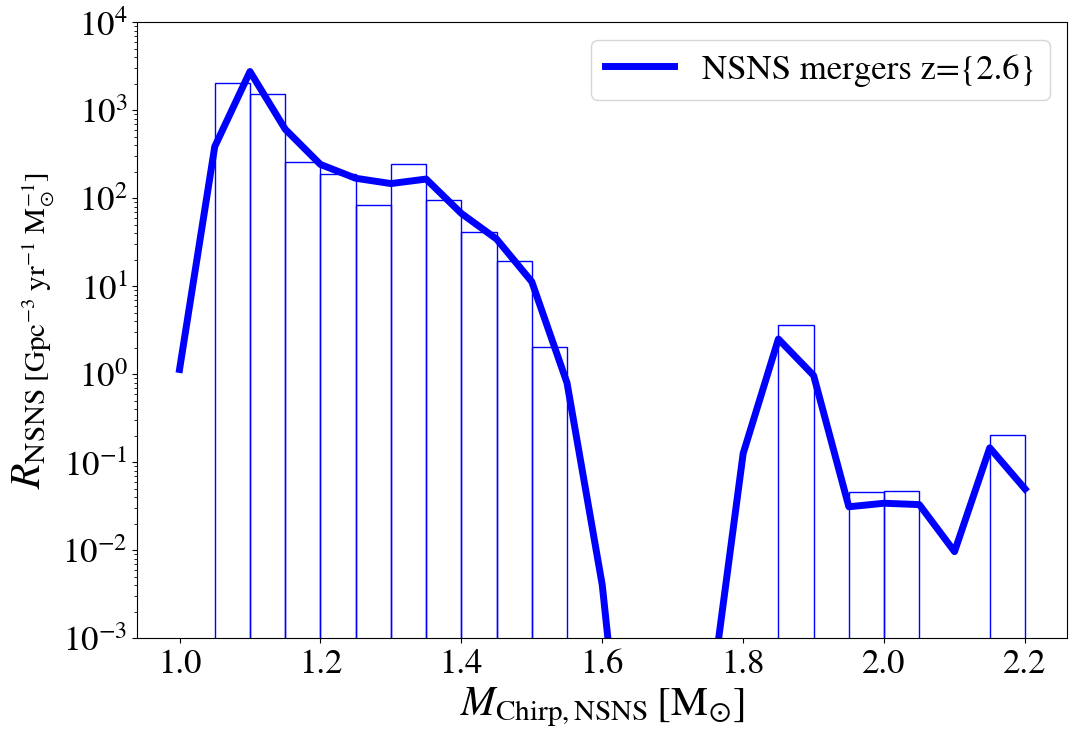

sum(hist) 227.2467274055732 sum(hist*Mbinwidth) 11.362336370278662


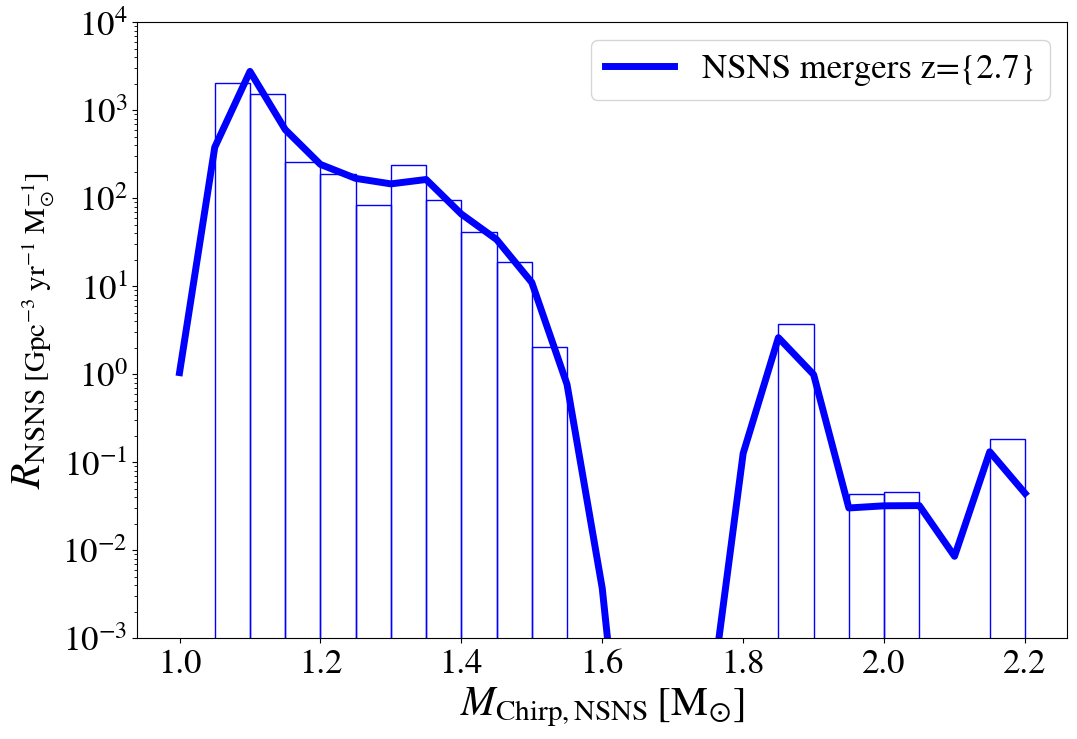

sum(hist) 225.63725707106914 sum(hist*Mbinwidth) 11.28186285355346


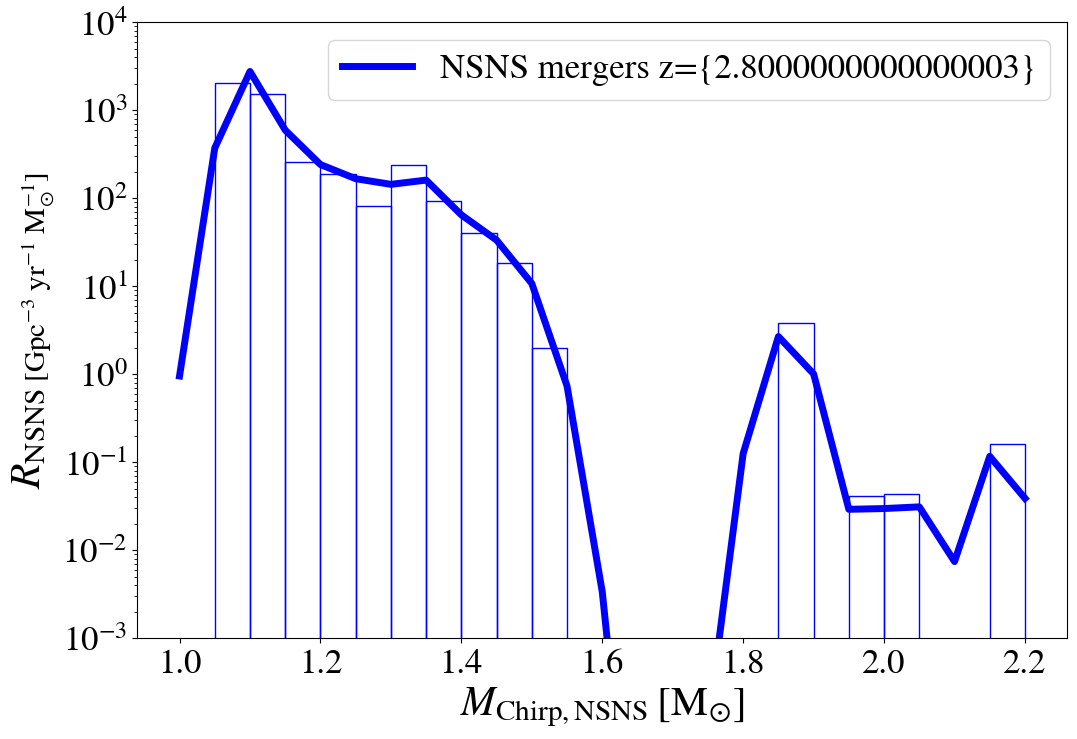

sum(hist) 222.9572660244523 sum(hist*Mbinwidth) 11.147863301222612


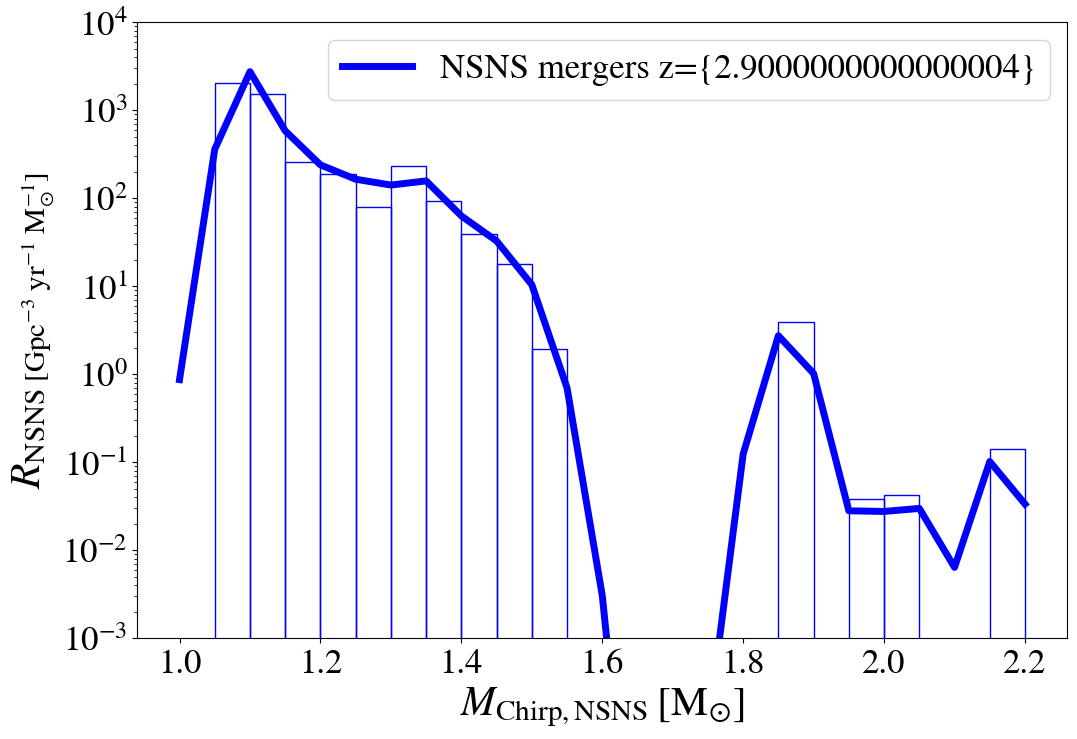

sum(hist) 219.26297371332598 sum(hist*Mbinwidth) 10.963148685666301


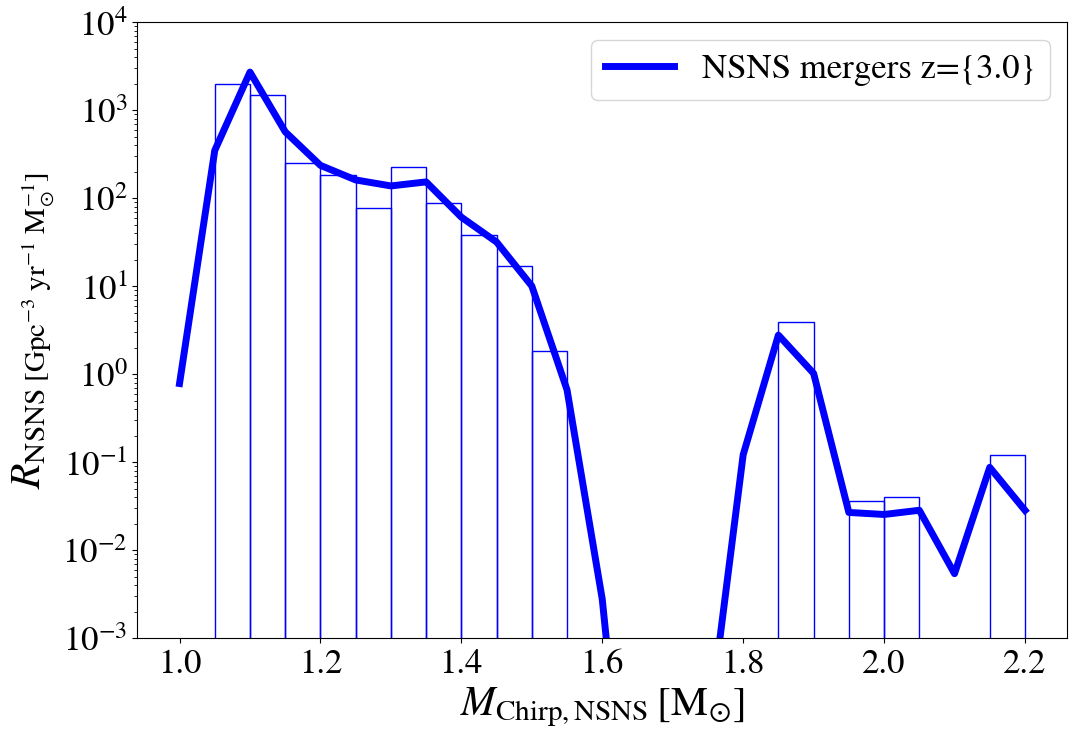

sum(hist) 214.60851587560327 sum(hist*Mbinwidth) 10.730425793780164


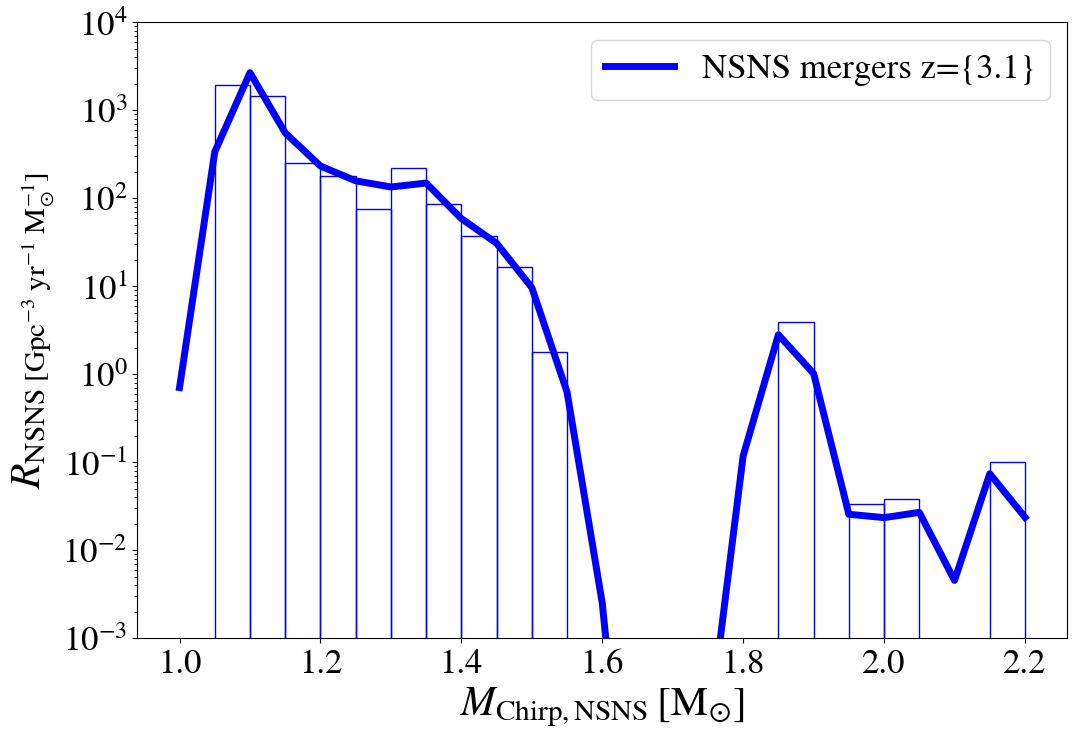

sum(hist) 209.14313945838282 sum(hist*Mbinwidth) 10.457156972919142


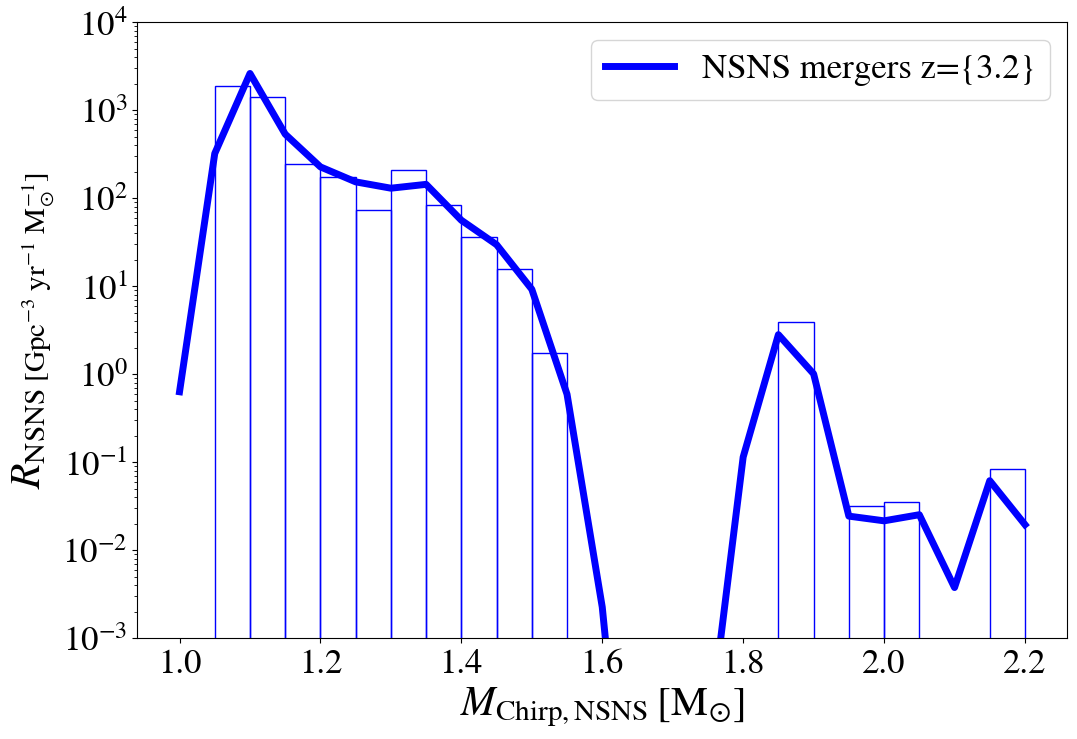

sum(hist) 202.96027503386557 sum(hist*Mbinwidth) 10.148013751693277


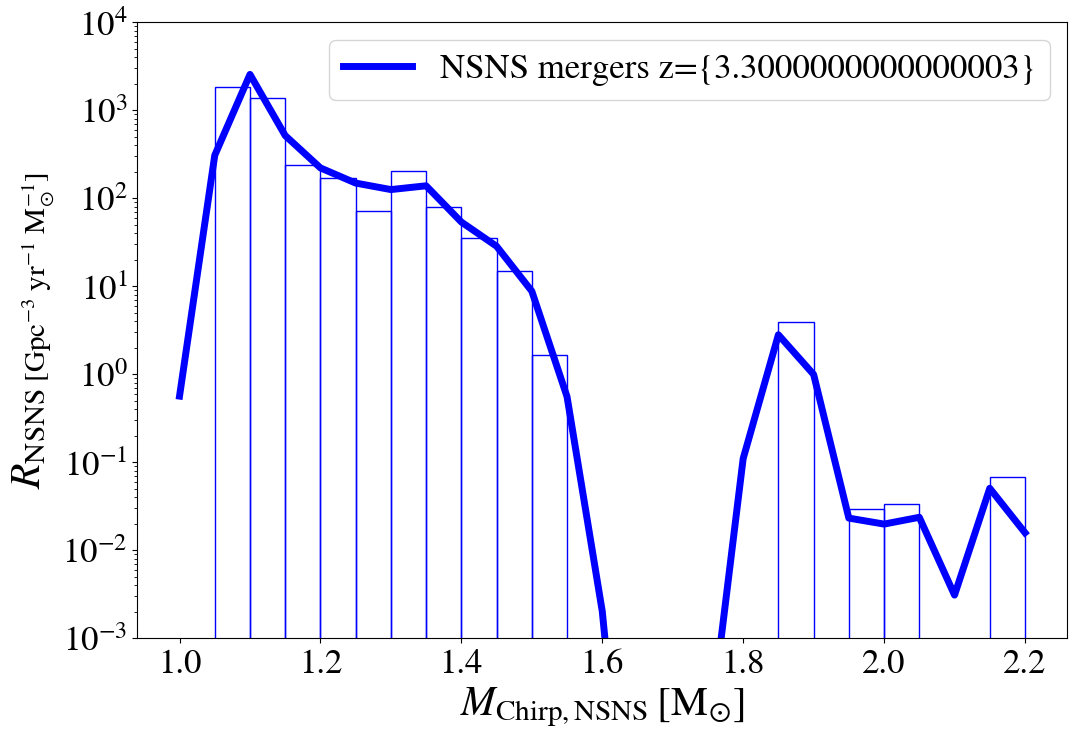

sum(hist) 196.1544090725213 sum(hist*Mbinwidth) 9.807720453626068


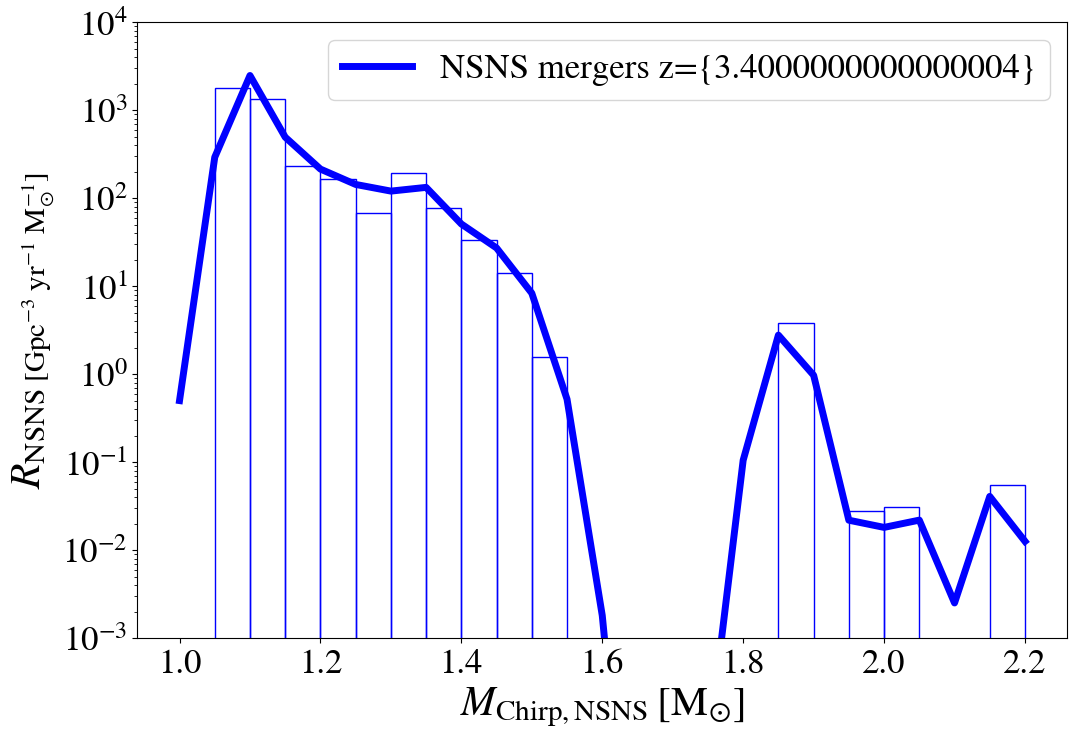

sum(hist) 188.8701849523161 sum(hist*Mbinwidth) 9.44350924761581


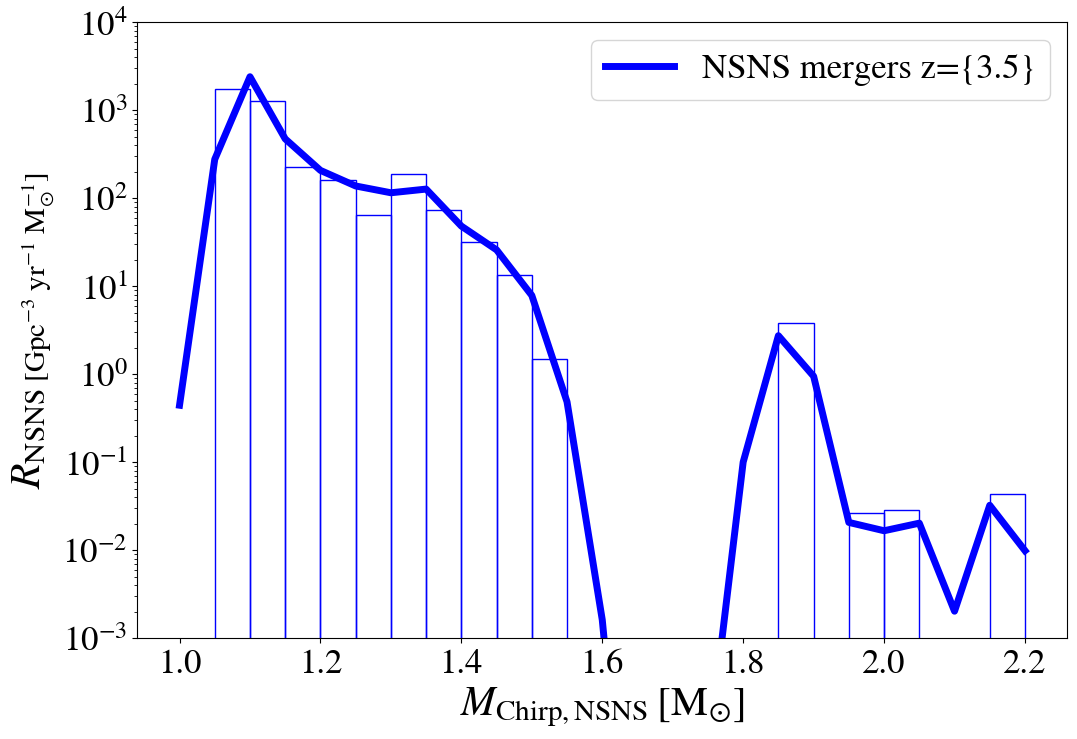

sum(hist) 181.21772696960198 sum(hist*Mbinwidth) 9.0608863484801


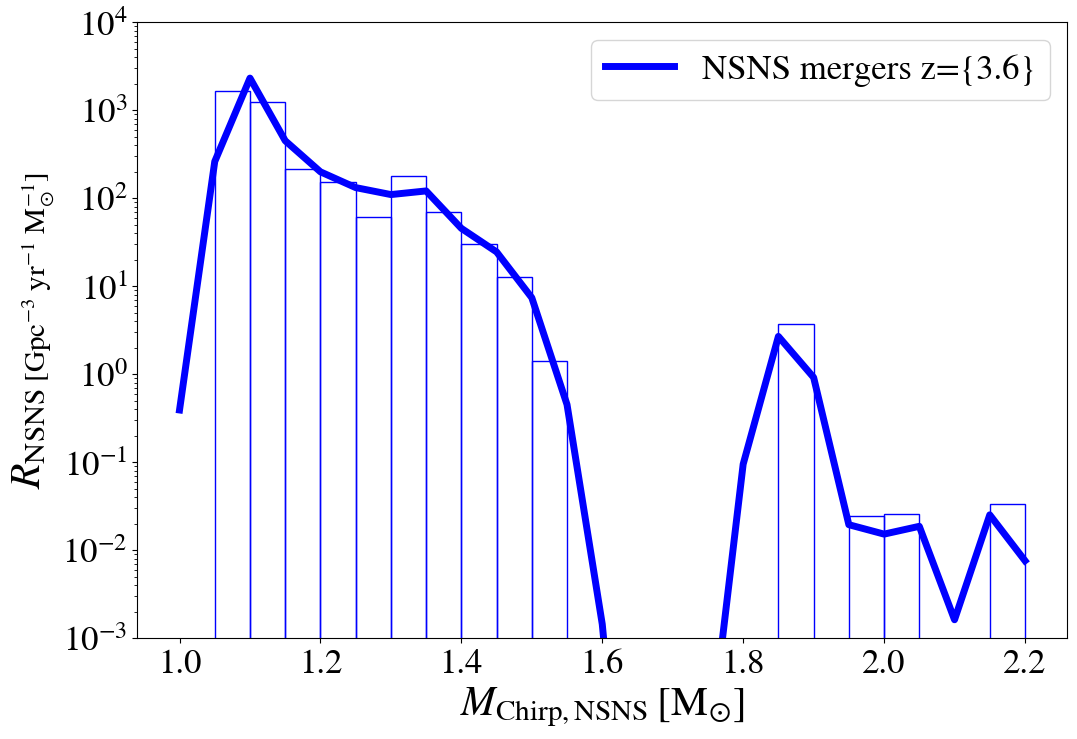

sum(hist) 173.32540978594565 sum(hist*Mbinwidth) 8.666270489297286


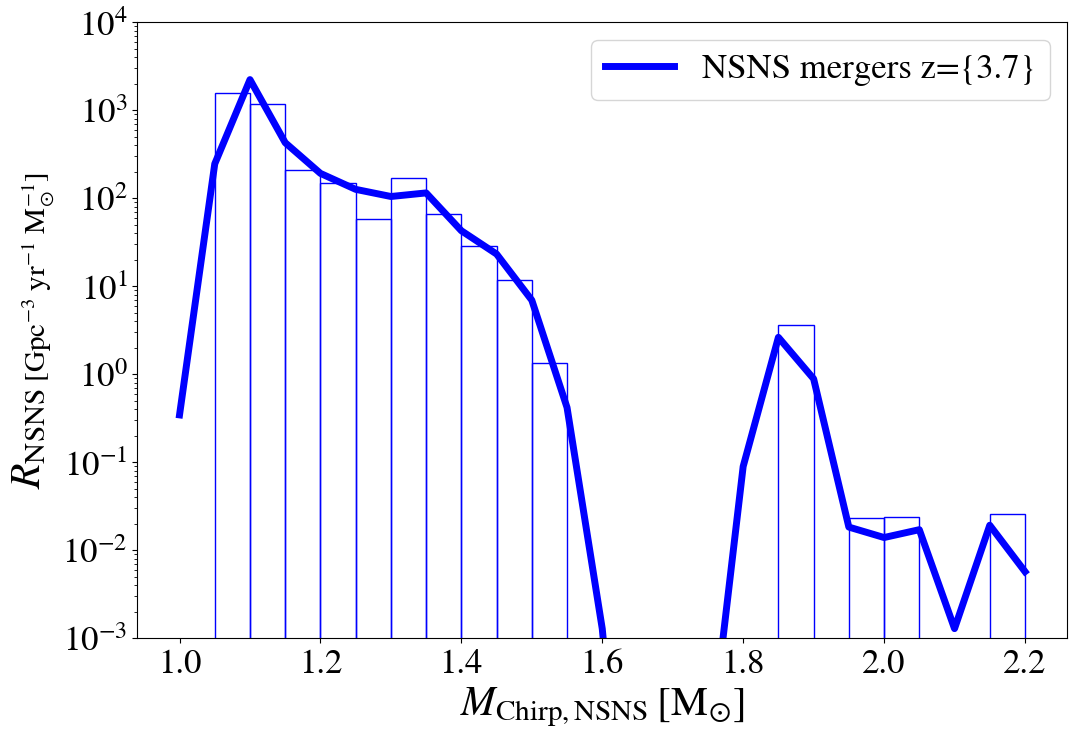

sum(hist) 165.32615245604433 sum(hist*Mbinwidth) 8.266307622802216


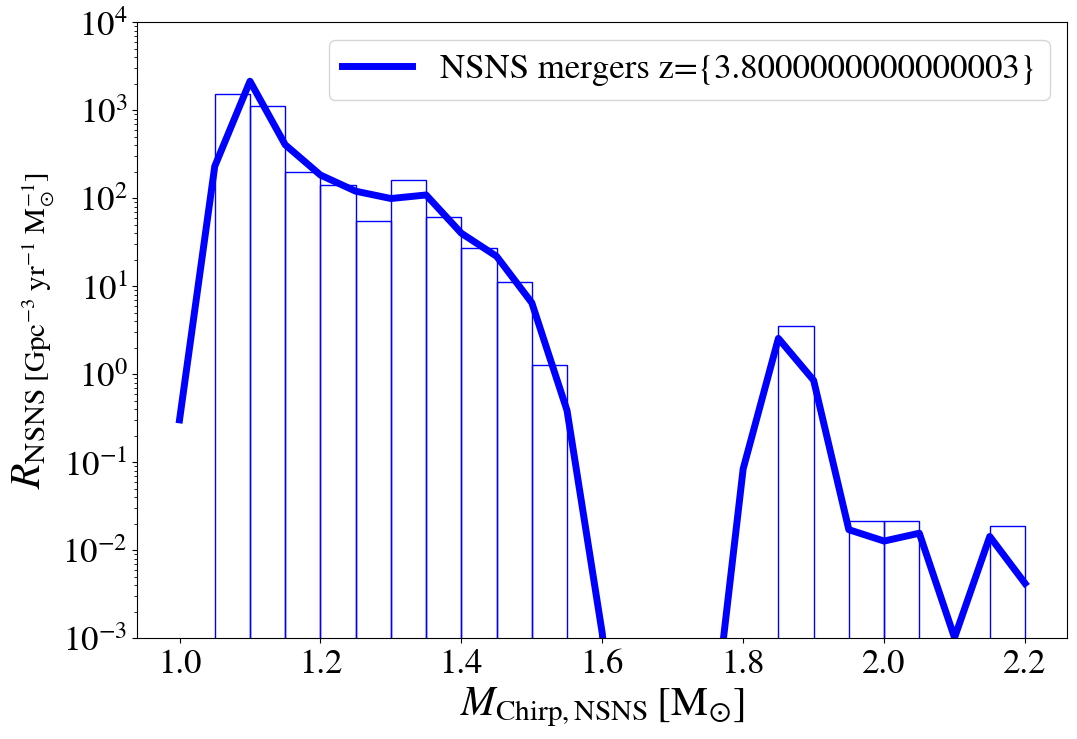

sum(hist) 157.28356308536 sum(hist*Mbinwidth) 7.864178154267999


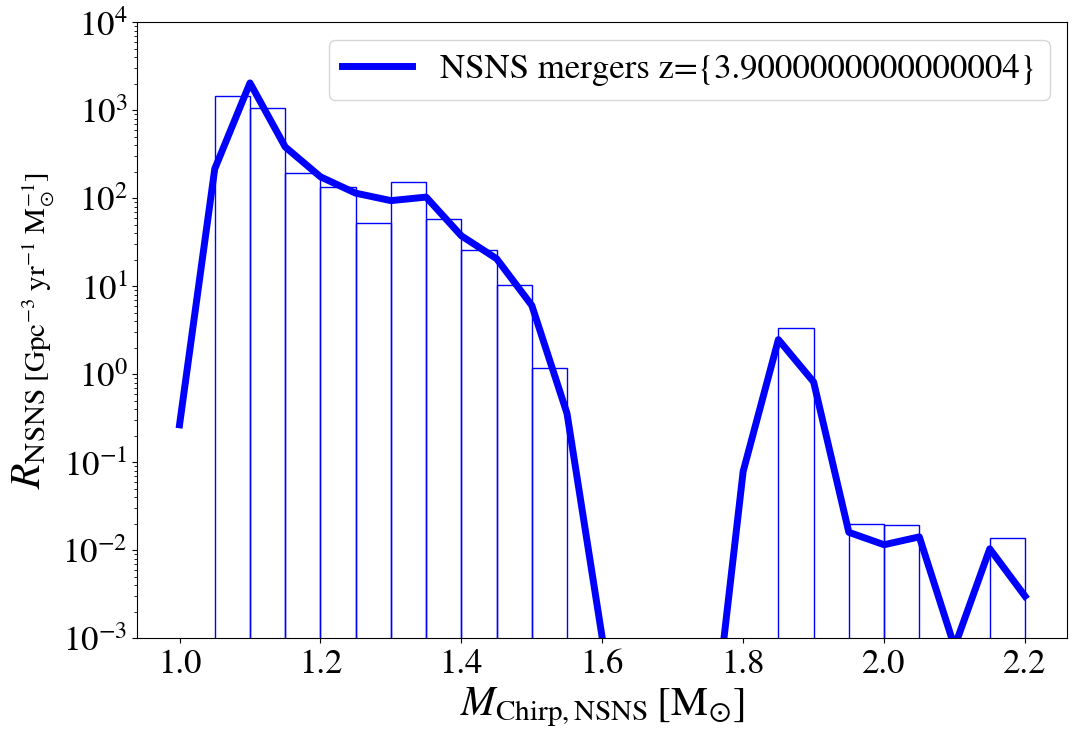

sum(hist) 149.26969240335254 sum(hist*Mbinwidth) 7.463484620167627


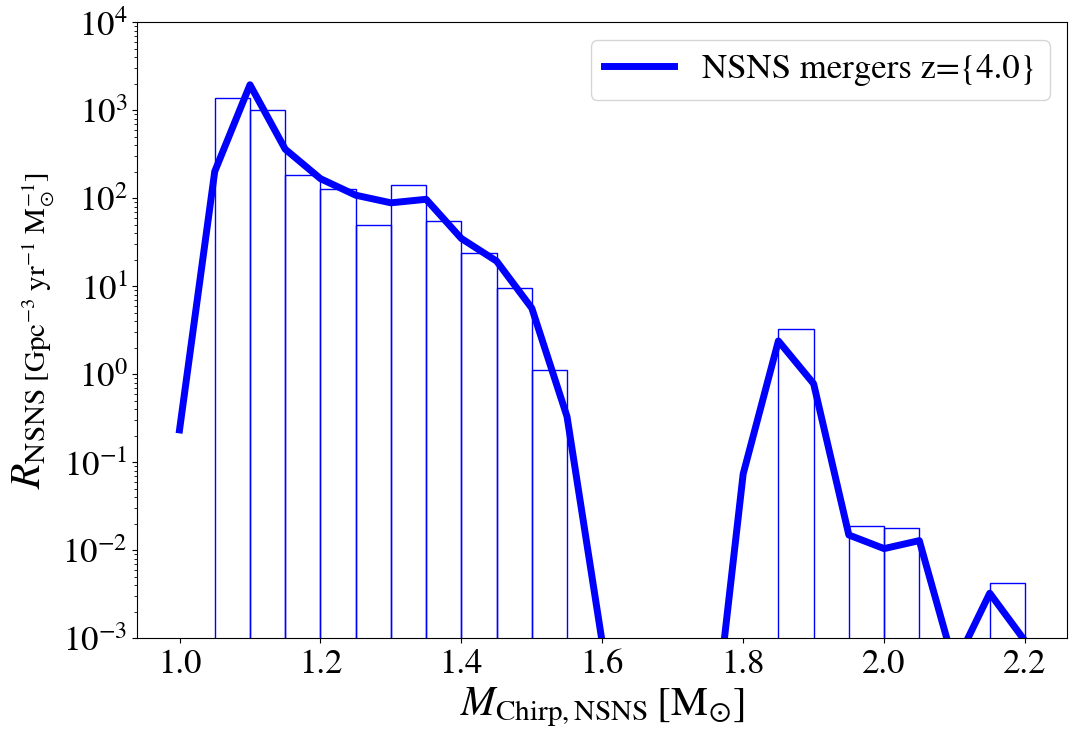

sum(hist) 141.39153008245358 sum(hist*Mbinwidth) 7.06957650412268


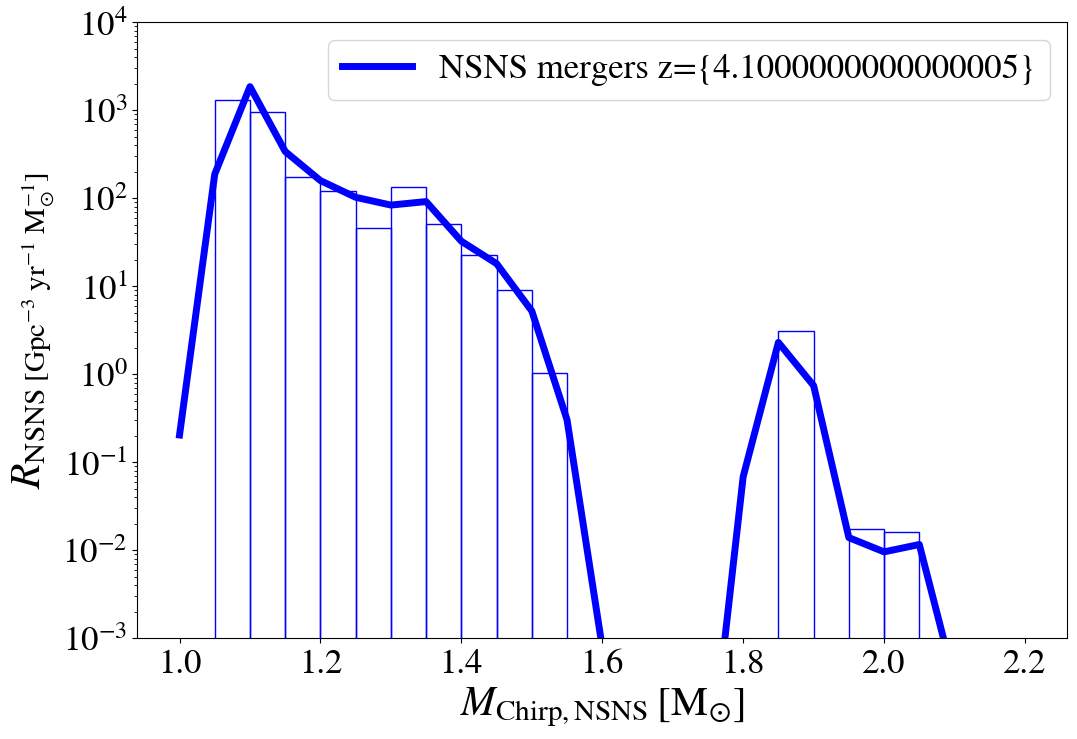

sum(hist) 133.66225004816468 sum(hist*Mbinwidth) 6.683112502408236


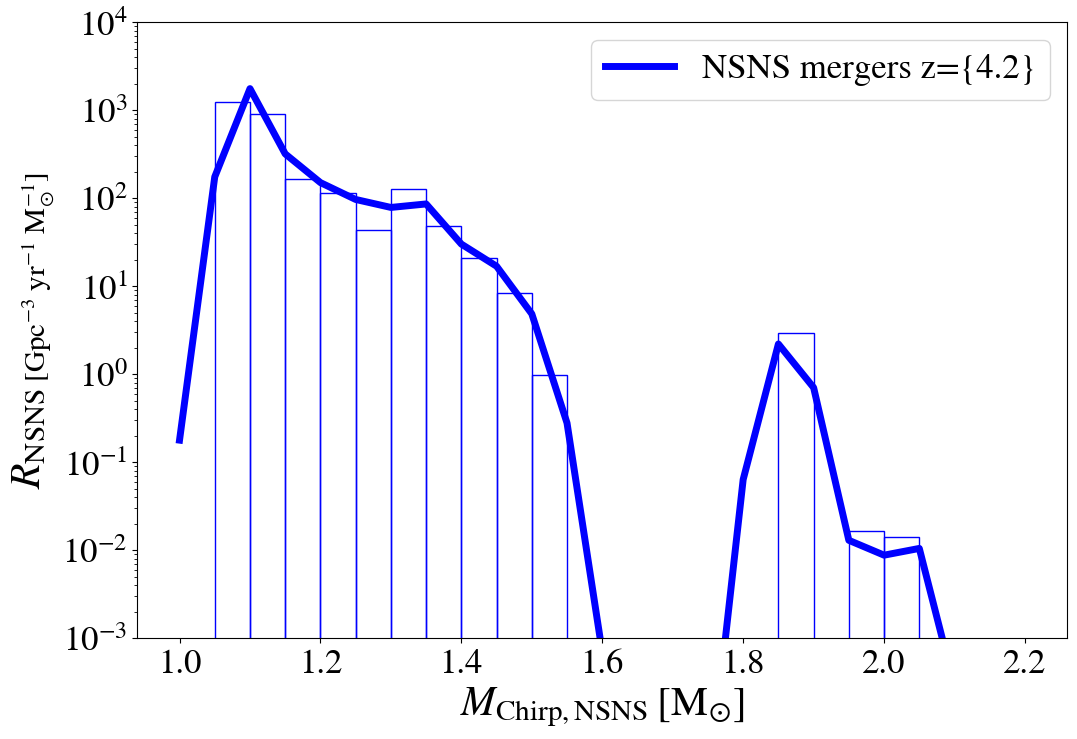

sum(hist) 126.18761245211383 sum(hist*Mbinwidth) 6.309380622605691


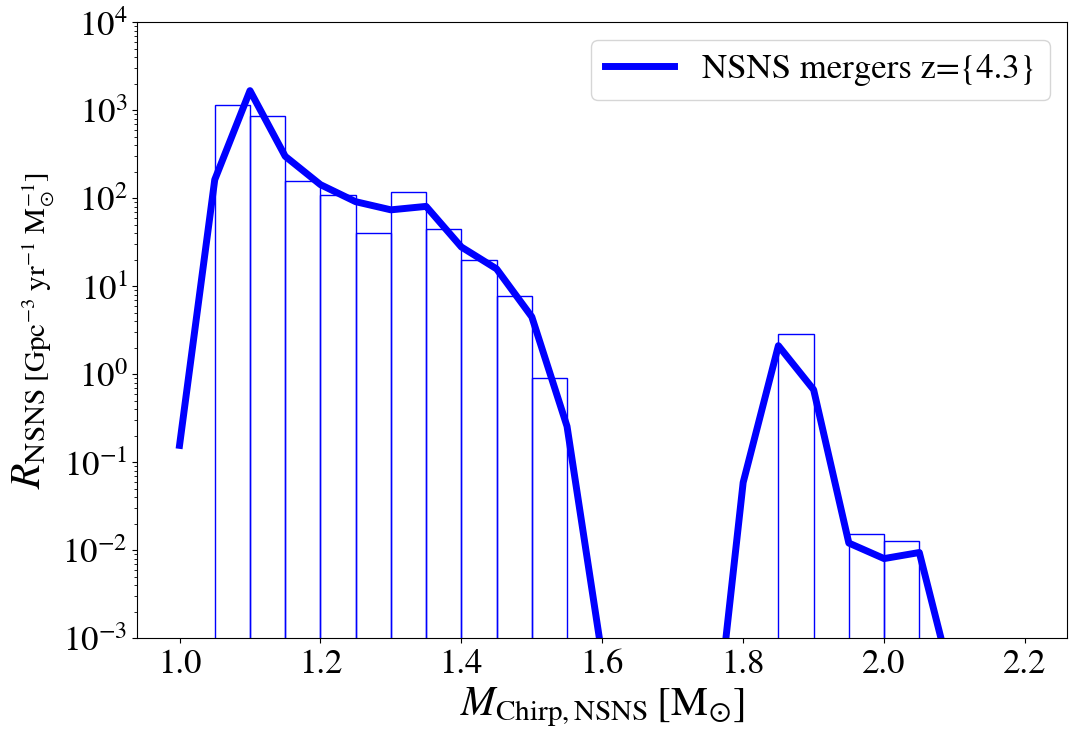

sum(hist) 118.95627619213086 sum(hist*Mbinwidth) 5.947813809606542


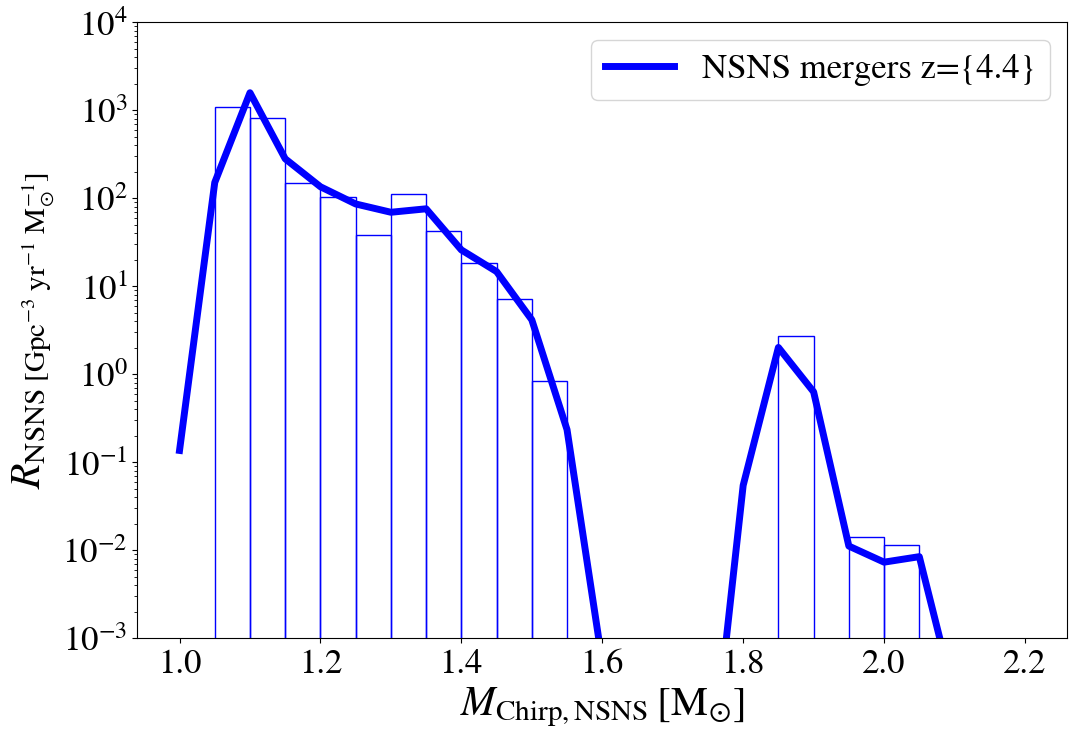

sum(hist) 112.02585072298321 sum(hist*Mbinwidth) 5.601292536149159


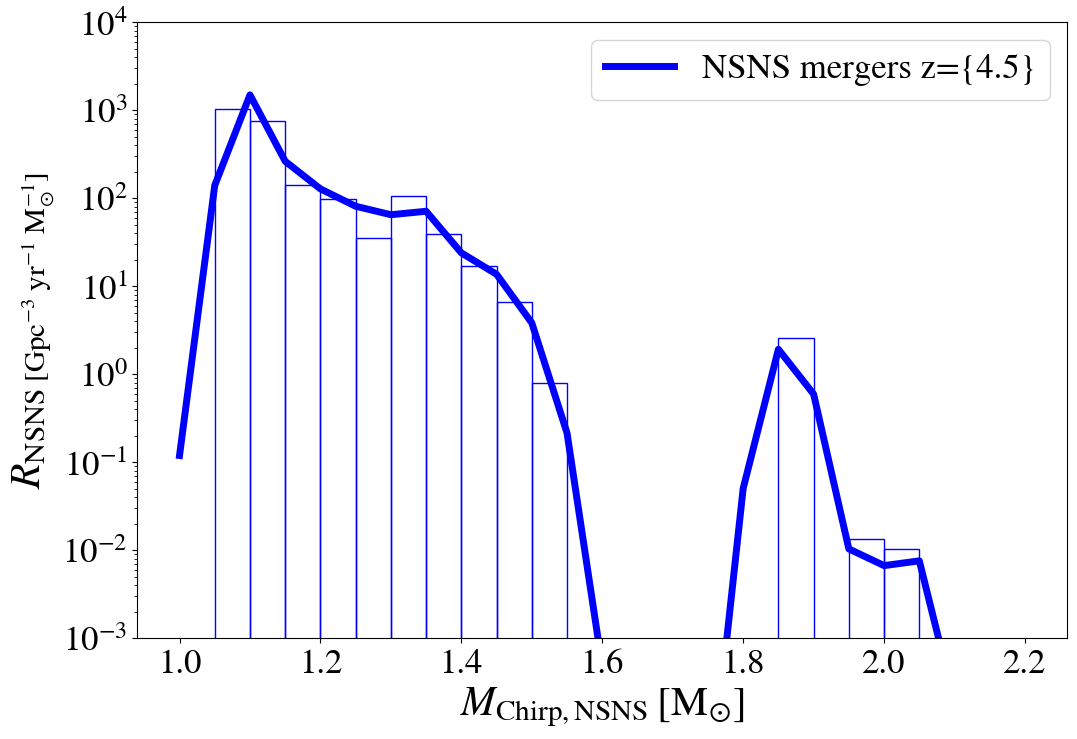

sum(hist) 105.3999762603805 sum(hist*Mbinwidth) 5.269998813019025


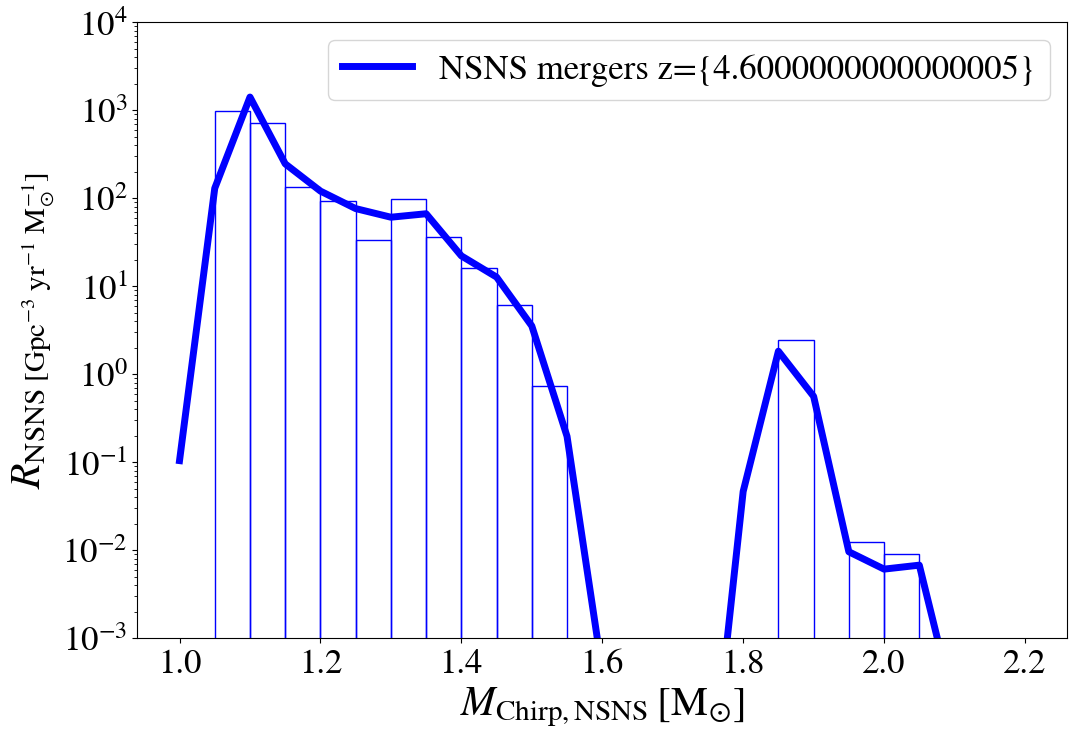

sum(hist) 99.07593490389445 sum(hist*Mbinwidth) 4.953796745194722


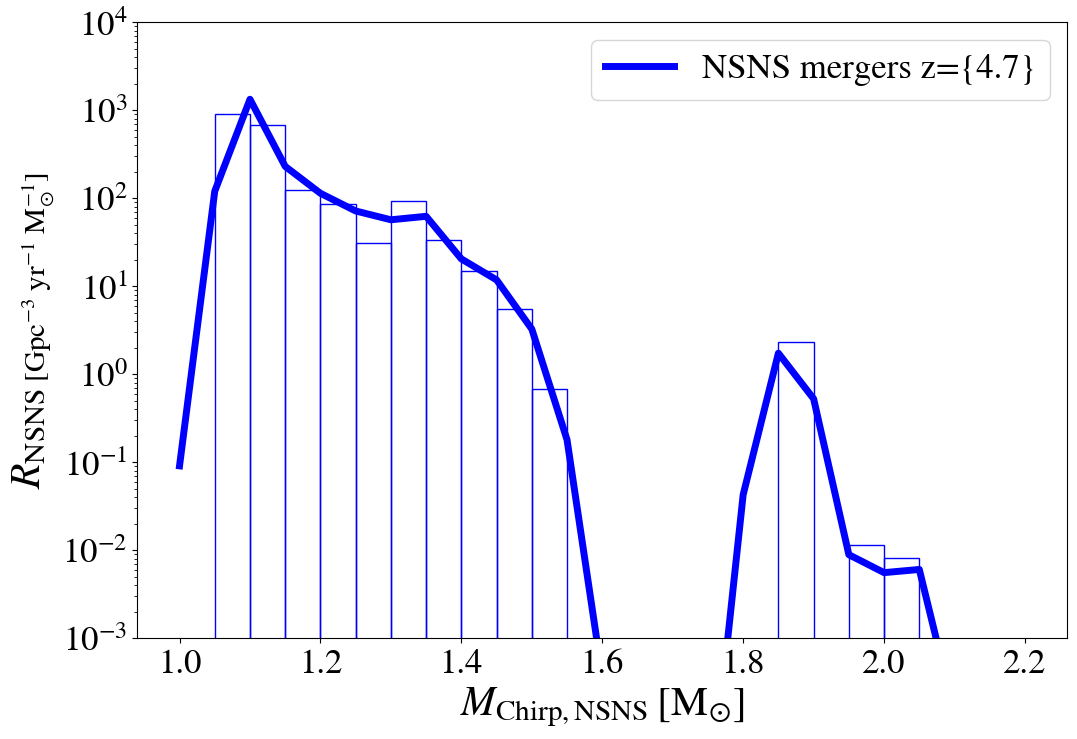

sum(hist) 93.06528019921326 sum(hist*Mbinwidth) 4.6532640099606635


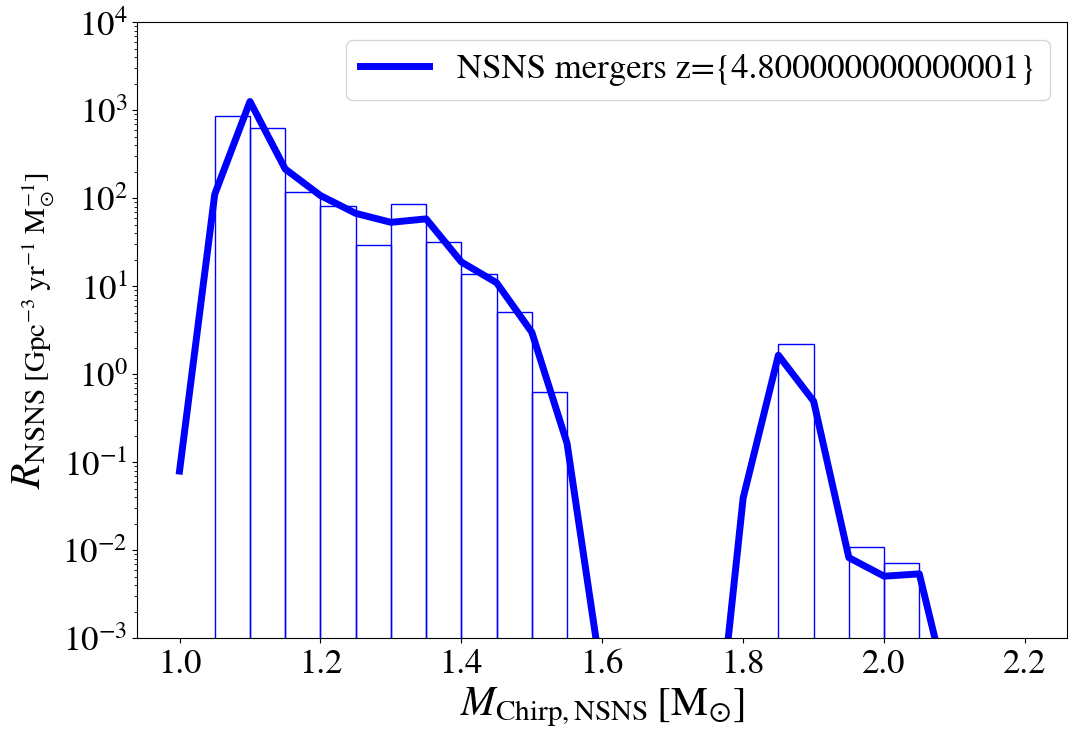

sum(hist) 87.39216274625265 sum(hist*Mbinwidth) 4.369608137312633


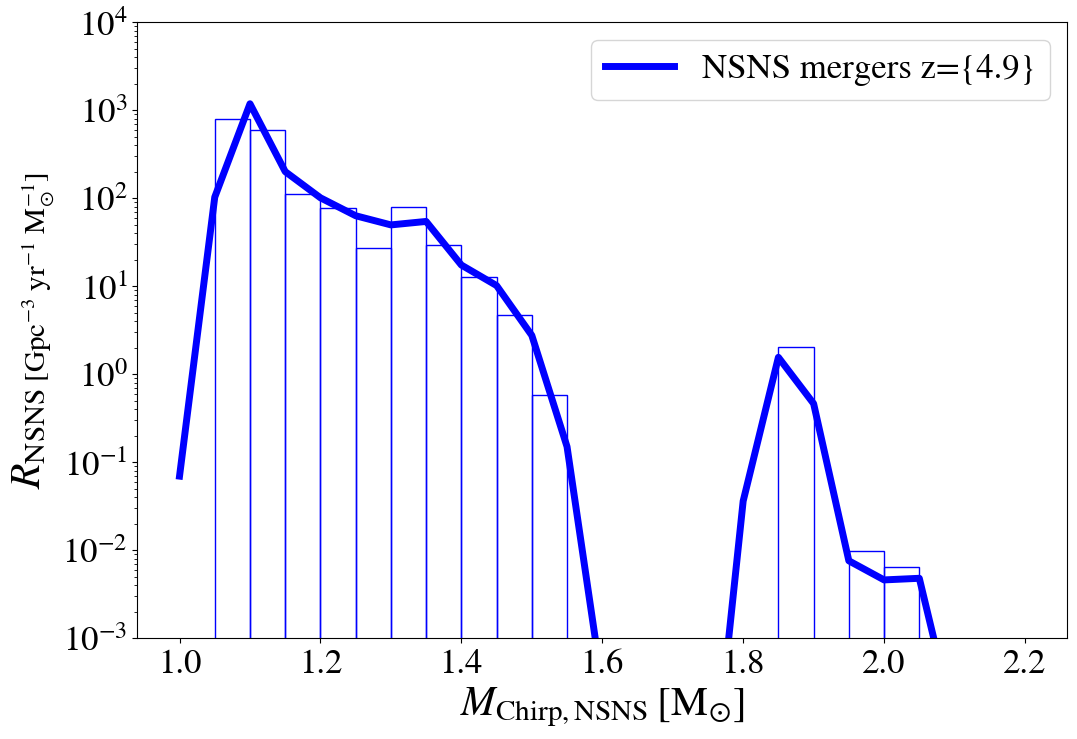

In [88]:


normalize_by_peak  = False

# Extract the rates and redshift
rates = File[sim_key]['merger_rate'][()]
redshifts = File[sim_key]['redshifts'][()]

for redshift_i in range(len(redshifts)):

    Mbinwidth = 0.05
    bins = np.arange(1,2.2,Mbinwidth)

    fig, ax = plt.subplots(figsize = (12, 8))

    # plot the histogram
    hist, bin_edge = np.histogram(NSNStable['Mchirp'], weights = rates[:, redshift_i], bins=bins)
    center_bins = (bin_edge[:-1] + bin_edge[1:])/2.

    if normalize_by_peak:
        norm = max(hist/Mbinwidth)
    else:
        norm = 1.

    y_vals = hist/Mbinwidth/norm
    ax.bar(center_bins, y_vals, width= np.diff(bins), 
            alpha=1.0, fill=False, edgecolor='blue',lw = 1.) 
    print('sum(hist)', sum(hist), 'sum(hist*Mbinwidth)', sum(hist*Mbinwidth) )

    # Plot the KDE
    kernel = stats.gaussian_kde(NSNStable['Mchirp'],  weights=rates[:, redshift_i], bw_method = 'silverman')
    x_KDE = np.arange(1,2.2,0.05)
    KDEy_vals = kernel(x_KDE)*sum(hist)/norm #re-normalize the KDE
    ax.plot(x_KDE, KDEy_vals,label = 'NSNS mergers z=%s'%{redshifts[redshift_i]},  color='blue', lw=5)

    # Plotvalues
    plt.xlabel('$M_{\mathrm{Chirp,NSNS} \ } [\mathrm{M_{\odot}} ]$', fontsize=30)
    plt.ylabel('$R_{\mathrm{NSNS} \ \mathrm{[Gpc^{-3} \ yr^{-1} \ M_{\odot}^{-1}}]}$', fontsize=30)
    ax.set_yscale('log')
    ax.set_ylim(1e-3, 1e4)
    plt.legend()
    plt.show()